# Intro to Data Science - Project

## Olympic Games Analysis

Sequência lógica:
- pré-processamento
- dados dos países (racechart, etc)
- dados do pessoal / dados por genero
- dados por esporte

### Libraries that will be used

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# !pip install plotly
import plotly.graph_objects as go
import requests

from bs4 import BeautifulSoup
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from IPython.core.display import display, HTML

sns.set_palette("twilight")
warnings.filterwarnings("ignore")

### Importing data

## Activity 1

In [17]:
PATH = "athlete_events.csv" 

# The dataset can be found in: 
# https://github.com/caiochacon/projeto_final_ICD/blob/main/datasets/new_olympic/archive.zip?raw=true

df = pd.read_csv(PATH)  
df.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

### Measures of centrality and dispersion of height, weight and age of athletes

In [18]:
#chosing the columns to be used
physiological_cols = ["Age", "Height", "Weight"]

df[physiological_cols].describe().iloc[1:,]

Age      Height      Weight
mean  25.556898  175.338970   70.702393
std    6.393561   10.518462   14.348020
min   10.000000  127.000000   25.000000
25%   21.000000  168.000000   60.000000
50%   24.000000  175.000000   70.000000
75%   28.000000  183.000000   79.000000
max   97.000000  226.000000  214.000000

### Boxplot of height, weight and age

In [19]:
def customBoxplot(col):
    """
        Function to create a boxplot more quickly for the activity 1 
    """
    
    plt.figure(figsize=(12,8))
    sns.boxplot(data=df, x="Sex", y=col, width=0.6)
    plt.xlabel("Sex",fontsize=12)
    plt.ylabel(f"{col}\n",fontsize=12)
    plt.title(f"Boxplot of Sex per {col}\n", fontsize=15)
    plt.show()

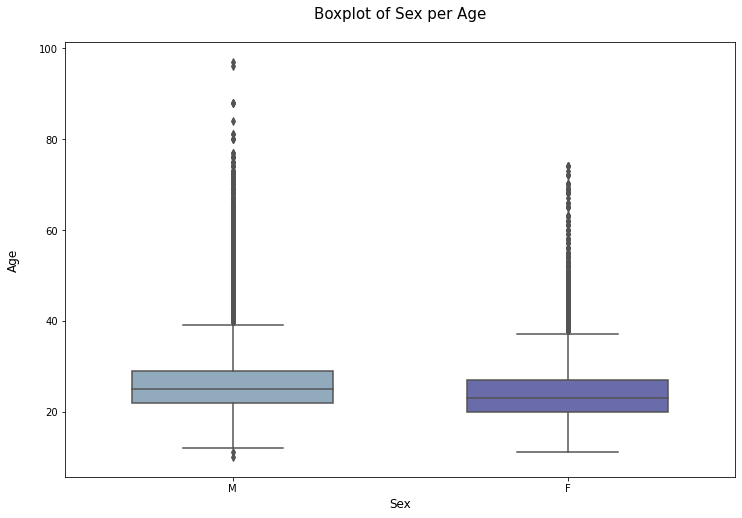

In [20]:
customBoxplot(physiological_cols[0])

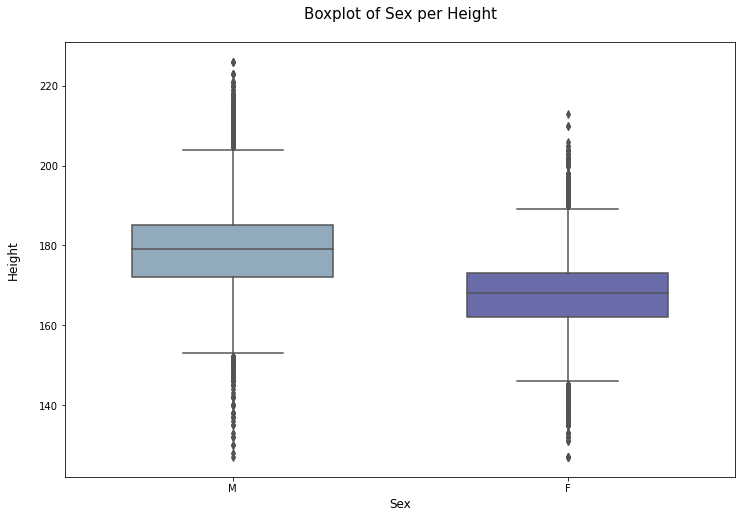

In [21]:
customBoxplot(physiological_cols[1])

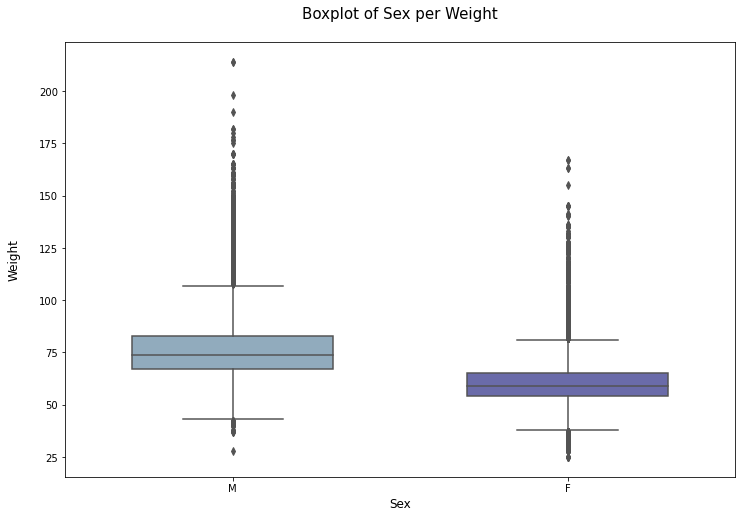

In [22]:
customBoxplot(physiological_cols[2])

## Activity 2

### Barplot: Top 10 countries with more gold medals

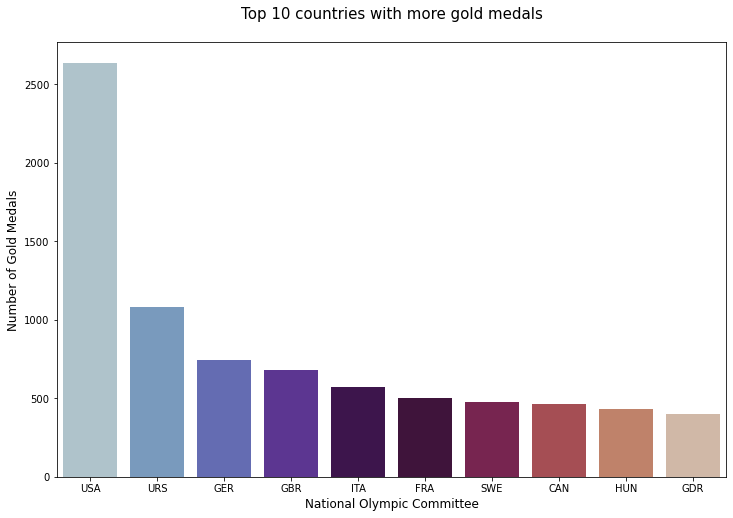

In [23]:
# Tacking just the gold medalists and turn "Gold" into 1 (for counting)
gold = df.query("Medal == 'Gold'").replace("Gold", 1)
# Tacking the top 10 countries
top10_gold = gold.groupby("NOC")["Medal"].sum().sort_values(ascending=False).head(10) 


plt.figure(figsize=(12,8))
sns.barplot(x=top10_gold.index, y=top10_gold.values, saturation=0.90, palette="twilight")
plt.xlabel("National Olympic Committee", fontsize=12)
plt.ylabel("Number of Gold Medals", fontsize=12)
plt.title("Top 10 countries with more gold medals\n", fontsize=15)
plt.show()

### Histogram of Height and Weight

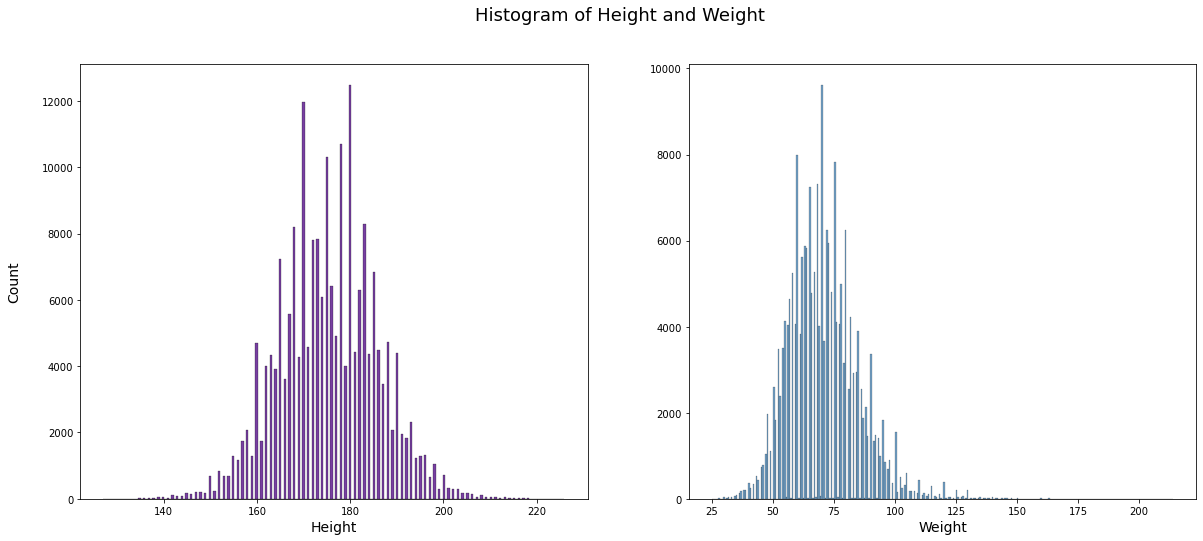

In [24]:
plt.figure(figsize=(20,8))
plt.suptitle("Histogram of Height and Weight", fontsize=18)

plt.subplot(1,2,1)
sns.histplot(data=df, x="Height", color="indigo")
plt.xlabel("Height", fontsize=14)
plt.ylabel("Count\n", fontsize=14)

plt.subplot(1,2,2)
sns.histplot(data=df, x="Weight", color="steelblue")
plt.xlabel("Weight", fontsize=14)
plt.ylabel("")

plt.show()

### Lineplot: Brazil performance in the Summer Olympics

In [25]:
# Tacking just the Brazilian performance
br = df.query("NOC == 'BRA' & Season == 'Summer'")
# Binary: Medal = 1 | No Medal = 0
br["BinMedal"] = (br["Medal"].isna() == False)
# Grouping for year
brMedals = br.groupby("Year")["BinMedal"].sum()

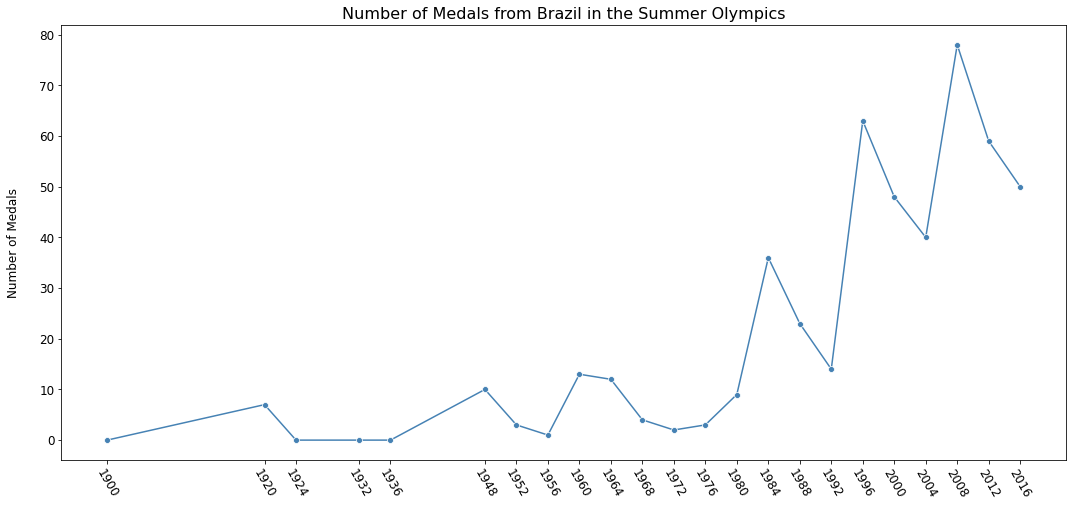

In [26]:
plt.figure(figsize=(18,8))
sns.lineplot(x=brMedals.index, y=brMedals.values, marker="o", color="steelblue")
plt.xticks(brMedals.index, rotation=300, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("")
plt.ylabel("Number of Medals\n", fontsize=12)
plt.title("Number of Medals from Brazil in the Summer Olympics", fontsize=16)
plt.show()

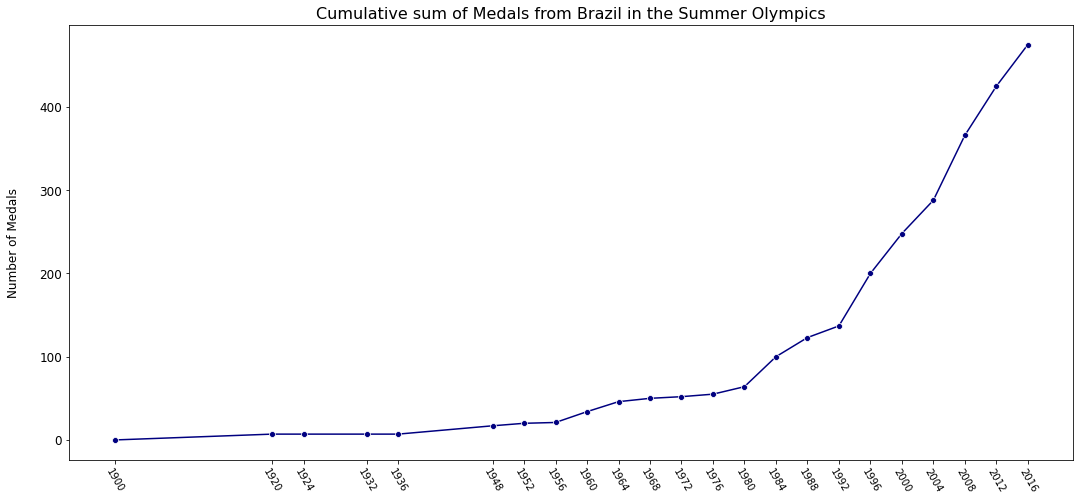

In [27]:
plt.figure(figsize=(18,8))
sns.lineplot(x=brMedals.cumsum().index, y=brMedals.cumsum().values, marker="o", color="navy")
plt.xticks(brMedals.index, rotation=300)
plt.yticks(fontsize=12)
plt.xlabel("")
plt.ylabel("Number of Medals\n", fontsize=12)
plt.title("Cumulative sum of Medals from Brazil in the Summer Olympics", fontsize=16)
plt.show()

## Assignment 3

### Checking for missing values.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


### Transform missing values of each athlete into mean value of said athlete's sport.
   We believe this is a good choice because it preserves the main characteristics of the sport ie. basketball athletes are generally taller than average etc

In [29]:
# Creates the {sport: mean_age_by_sport} dict
mean_age_by_sport = df.groupby("Sport").mean().reset_index().drop(columns = ["Height","Year","ID","Weight"])
mean_age_dict = dict(zip(mean_age_by_sport["Sport"],mean_age_by_sport["Age"]))

# Transforms null values into mean age by sport
null_ages = df[pd.isnull(df["Age"])]
null_ages["Age"] = null_ages["Sport"].map(mean_age_dict)
df["Age"].fillna(null_ages["Age"],inplace=True)
df.info() # 9474 values transformed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [30]:
mean_height_by_sport = df.groupby("Sport").mean().reset_index().drop(columns = ["Age","Year","ID","Weight"])
mean_height_dict = dict(zip(mean_height_by_sport["Sport"],mean_height_by_sport["Height"]))

null_heights = df[pd.isnull(df["Height"])]
null_heights["Height"] = null_heights["Sport"].map(mean_height_dict)
df["Height"].fillna(null_heights["Height"],inplace=True)
df.info() # 60072 values transformed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271017 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [31]:
mean_weight_by_sport = df.groupby("Sport").mean().reset_index().drop(columns = ["Age","Year","ID","Height"])
mean_weight_dict = dict(zip(mean_weight_by_sport["Sport"],mean_weight_by_sport["Weight"]))

null_weights = df[pd.isnull(df["Weight"])]
null_weights["Weight"] = null_weights["Sport"].map(mean_weight_dict)
df["Weight"].fillna(null_weights["Weight"],inplace=True)
df.info() # 62658 values transformed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271017 non-null  float64
 5   Weight  270899 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


### Transform NaN medal values into "No Medal".

In [32]:
df["Medal"].fillna("No medal",inplace=True)

### Drop remaining NaN values, since no more useful transformations can be performed on them.

In [33]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270899 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      270899 non-null  int64  
 1   Name    270899 non-null  object 
 2   Sex     270899 non-null  object 
 3   Age     270899 non-null  float64
 4   Height  270899 non-null  float64
 5   Weight  270899 non-null  float64
 6   Team    270899 non-null  object 
 7   NOC     270899 non-null  object 
 8   Games   270899 non-null  object 
 9   Year    270899 non-null  int64  
 10  Season  270899 non-null  object 
 11  City    270899 non-null  object 
 12  Sport   270899 non-null  object 
 13  Event   270899 non-null  object 
 14  Medal   270899 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 33.1+ MB


### Transforming Age, Height and Weight into integers

In [34]:
df = df.astype({"Age":int,"Height":int,"Weight":int})
df.head()

ID                      Name Sex  Age  Height  Weight            Team  NOC  \
0   1                 A Dijiang   M   24     180      80           China  CHN   
1   2                  A Lamusi   M   23     170      60           China  CHN   
2   3       Gunnar Nielsen Aaby   M   24     175      70         Denmark  DEN   
3   4      Edgar Lindenau Aabye   M   34     182      95  Denmark/Sweden  DEN   
4   5  Christine Jacoba Aaftink   F   21     185      82     Netherlands  NED   

         Games  Year  Season       City          Sport  \
0  1992 Summer  1992  Summer  Barcelona     Basketball   
1  2012 Summer  2012  Summer     London           Judo   
2  1920 Summer  1920  Summer  Antwerpen       Football   
3  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event     Medal  
0       Basketball Men's Basketball  No medal  
1      Judo Men's Extra-Lightweight  No medal  
2           Football Men's Football  No medal  
3       Tug-Of-War Men's Tug-Of-War      Gold  
4  Speed Skating Women's 500 metres  No medal

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270899 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ID      270899 non-null  int64 
 1   Name    270899 non-null  object
 2   Sex     270899 non-null  object
 3   Age     270899 non-null  int32 
 4   Height  270899 non-null  int32 
 5   Weight  270899 non-null  int32 
 6   Team    270899 non-null  object
 7   NOC     270899 non-null  object
 8   Games   270899 non-null  object
 9   Year    270899 non-null  int64 
 10  Season  270899 non-null  object
 11  City    270899 non-null  object
 12  Sport   270899 non-null  object
 13  Event   270899 non-null  object
 14  Medal   270899 non-null  object
dtypes: int32(3), int64(2), object(10)
memory usage: 30.0+ MB


### Perguntas

1-) Quais colunas precisaram de limpeza ou transformação? As colunas: Age, Height, Weight e Medal

2-) Que métodos foram utilizados nas colunas citadas na pergunta anterior? Substituição de valores nulos por média/valor específico, descarte de valores nulos e mudança de tipo

## Activity 4

In [36]:
# Transform Sex column in numerical data
df['NSex'] = df['Sex'].replace({'M': 1, 'F': 2})
# Male = 1
# Female = 2

In [37]:
df.head()

ID                      Name Sex  Age  Height  Weight            Team  NOC  \
0   1                 A Dijiang   M   24     180      80           China  CHN   
1   2                  A Lamusi   M   23     170      60           China  CHN   
2   3       Gunnar Nielsen Aaby   M   24     175      70         Denmark  DEN   
3   4      Edgar Lindenau Aabye   M   34     182      95  Denmark/Sweden  DEN   
4   5  Christine Jacoba Aaftink   F   21     185      82     Netherlands  NED   

         Games  Year  Season       City          Sport  \
0  1992 Summer  1992  Summer  Barcelona     Basketball   
1  2012 Summer  2012  Summer     London           Judo   
2  1920 Summer  1920  Summer  Antwerpen       Football   
3  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event     Medal  NSex  
0       Basketball Men's Basketball  No medal     1  
1      Judo Men's Extra-Lightweight  No medal     1  
2           Football Men's Football  No medal     1  
3       Tug-Of-War Men's Tug-Of-War      Gold     1  
4  Speed Skating Women's 500 metres  No medal     2

In [38]:
# function to plot grouped data

def grouped(data, col1, col2, num):
    # co1 and col2 are names of columns
    # num is the number of clusters
    
    kmeans = KMeans(n_clusters=num)
    kmeans.fit(data[[col1, col2]])
    sns.scatterplot(data=data[[col1, col2]], x=col1, y=col2, hue=kmeans.labels_)

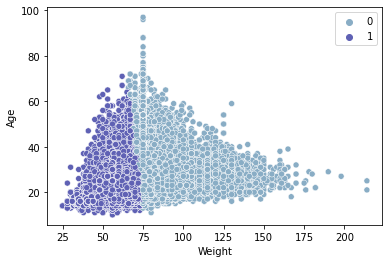

In [39]:
grouped(df, 'Weight', 'Age', 2)

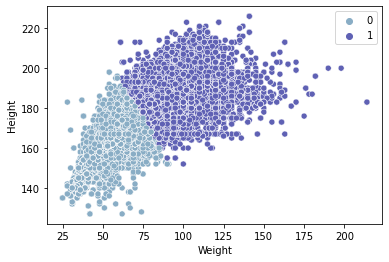

In [40]:
grouped(df, 'Weight', 'Height', 2)

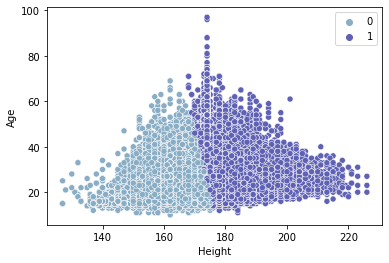

In [41]:
grouped(df, 'Height', 'Age', 2)

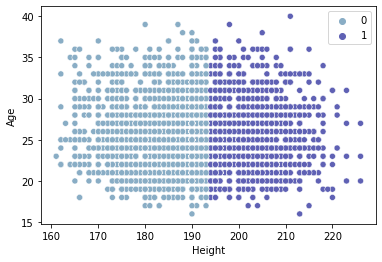

In [42]:
basketball = df[df['Sport'] == 'Basketball']
grouped(basketball, 'Height', 'Age', 2)

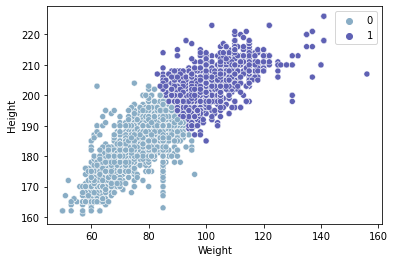

In [43]:
grouped(basketball, 'Weight', 'Height', 2)

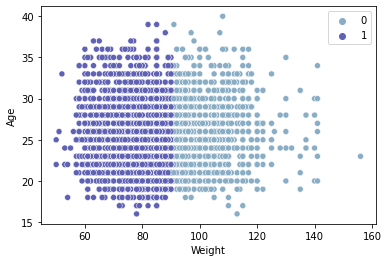

In [44]:
grouped(basketball, 'Weight', 'Age', 2)

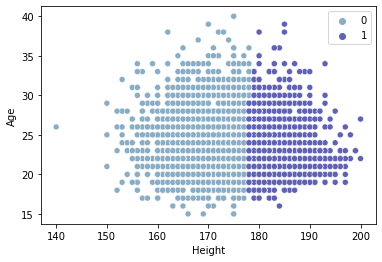

In [45]:
football = df[df['Sport'] == 'Football']
grouped(football, 'Height', 'Age', 2)

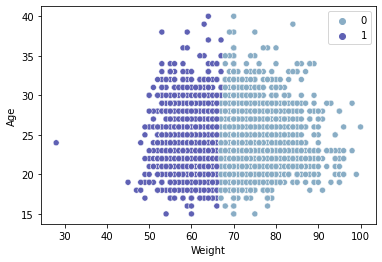

In [46]:
grouped(football, 'Weight', 'Age', 2)

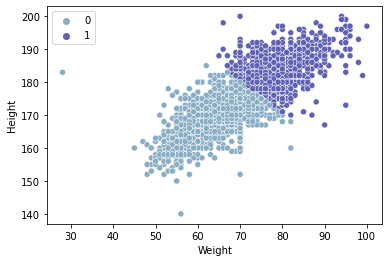

In [47]:
grouped(football, 'Weight', 'Height', 2)

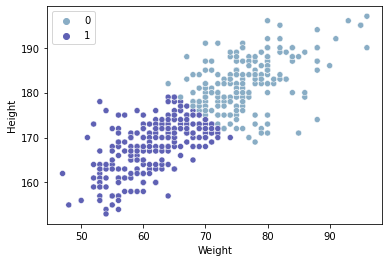

In [48]:
grouped(football[football['Year'] == 2016], 'Weight', 'Height', 2)

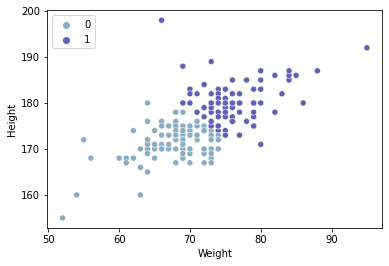

In [49]:
grouped(football[football['Year'] == 1976], 'Weight', 'Height', 2)

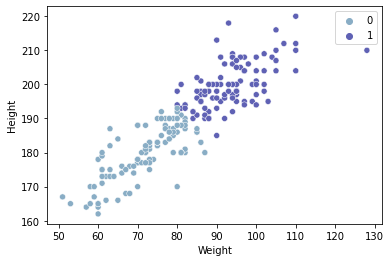

In [50]:
grouped(basketball[basketball['Year'] == 1976], 'Weight', 'Height', 2)

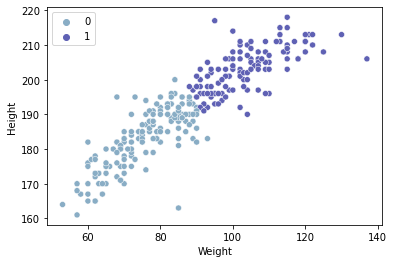

In [51]:
grouped(basketball[basketball['Year'] == 2016], 'Weight', 'Height', 2)

In [133]:
winners = df[df['Medal'] != "No medal"]
winners['Name'].value_counts()[:60]

Michael Fred Phelps, II                            28
Larysa Semenivna Latynina (Diriy-)                 18
Nikolay Yefimovich Andrianov                       15
Edoardo Mangiarotti                                13
Ole Einar Bjrndalen                                13
Borys Anfiyanovych Shakhlin                        13
Takashi Ono                                        13
Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)    12
Sawao Kato                                         12
Paavo Johannes Nurmi                               12
Natalie Anne Coughlin (-Hall)                      12
Ryan Steven Lochte                                 12
Aleksey Yuryevich Nemov                            12
Dara Grace Torres (-Hoffman, -Minas)               12
Birgit Fischer-Schmidt                             12
Carl Townsend Osburn                               11
Viktor Ivanovych Chukarin                          11
Mark Andrew Spitz                                  11
Matthew Nicholas "Matt" Bion

### Perguntas

1) Algum padrão foi descoberto? Cite algumas descobertas que chamaram atenção. Nos esportes vistos o padrão de peso e altura se manteve. Isso significa que, mesmo com os avanços no estudo do esporte, a procura pelo porte físico dos atletas ainda é bem similar, mesmo depois de 40 anos.

2) Alguma nova pergunta foi descoberta ao analisar os diferentes agrupamentos? Se sim, cite quais foram as perguntas. Queremos investigar mais a relação de escolha de físico dos atletas com o decorrer do tempo e variação do esporte. 

In [52]:
male = df[df['Sex'] == 'M']
female = df[df['Sex'] == 'F']
df.head(2)

# Pergunta complexa: analisar os times masculinos e femininos de países de diferentes continentes (EUA, BRA, CHN...) 
# em cima das perguntas acima
# Padronizar cores e etc


# Como começar a história? Começar descrevendo as características, depois vamos pras medalhas

ID       Name Sex  Age  Height  Weight   Team  NOC        Games  Year  \
0   1  A Dijiang   M   24     180      80  China  CHN  1992 Summer  1992   
1   2   A Lamusi   M   23     170      60  China  CHN  2012 Summer  2012   

   Season       City       Sport                         Event     Medal  NSex  
0  Summer  Barcelona  Basketball   Basketball Men's Basketball  No medal     1  
1  Summer     London        Judo  Judo Men's Extra-Lightweight  No medal     1

In [53]:
m = male['Age'].value_counts()
f = female['Age'].value_counts()

f_aux = {10: 0}
f_aux = pd.Series(f_aux)
f = f.append(f_aux)

m = m.sort_index()
f = f.sort_index()

man = {}
acumulador = 0

for i in range(6, 74, 6):
    if i <= 42:
        temp = m[i-6:i]
        man[f'{temp.index[0]}-{temp.index[-1]}'] = temp.sum()
    else:
        temp = m[i-6:i]
        acumulador += temp.sum()
man['52+'] = acumulador + 2

'''
Tanto o + 2 ao fim desse código quanto o -8 abaixo servem para
compensar os valores que não são pegos pelo loop do for.
Por exemplo: o for acima só vai até o 72, ele deixa o 73 e o 74 de fora. 
'''

woman = {}
acumulador = 0

for i in range(6, 62, 6):
    if i <= 42:
        temp = f[i-6:i]*-1
        woman[f'{temp.index[0]}-{temp.index[-1]}'] = temp.sum()
    else:
        temp = f[i-6:i]*-1
        acumulador += temp.sum()
woman['52+'] = acumulador - 8
woman

{'10-15': -2850,
 '16-21': -25480,
 '22-27': -29591,
 '28-33': -12790,
 '34-39': -2722,
 '40-45': -685,
 '46-51': -221,
 '52+': -176}

In [54]:
# Pirâmide etária

layout = go.Layout(yaxis=go.layout.YAxis(title='Age'),
                   xaxis=go.layout.XAxis(
                       range=[-95000, 95000],
                       tickvals=np.arange(-95000, 95001, 19000),
                       ticktext=np.arange(-95000, 95001, 19000)),
                   barmode='overlay',
                   bargap=0.1,
                   title='Age pyramid of Olympic participants')

data = [go.Bar(y=['10-15', '16-21', '22-27', '28-33', '34-39', '40-45','46-51', '52+'],
               x=pd.Series(man).values,
               orientation='h',
               name='Men',
               hoverinfo='x',
               marker=dict(color='crimson')
               ),
        go.Bar(y=['10-15', '16-21', '22-27', '28-33', '34-39', '40-45','46-51', '52+'],
               x=pd.Series(woman).values,
               orientation='h',
               name='Women',
               text=-1 * pd.Series(woman),
               hoverinfo='text',
               marker=dict(color='teal')
               )]


go.Figure(data=data, layout=layout)

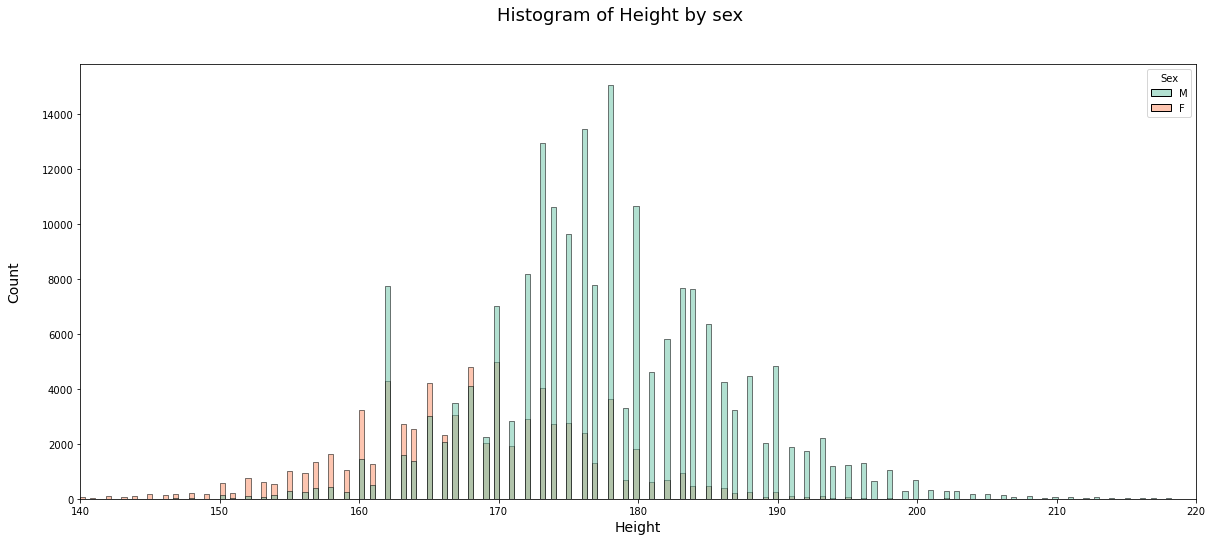

In [55]:
plt.figure(figsize=(20,8))
plt.suptitle("Histogram of Height by sex", fontsize=18)
plt.xlim(140, 220)

sns.histplot(data=df, x="Height", color="indigo", hue='Sex',  palette='Set2')
plt.xlabel("Height", fontsize=14)
plt.ylabel("Count\n", fontsize=14)

plt.show()

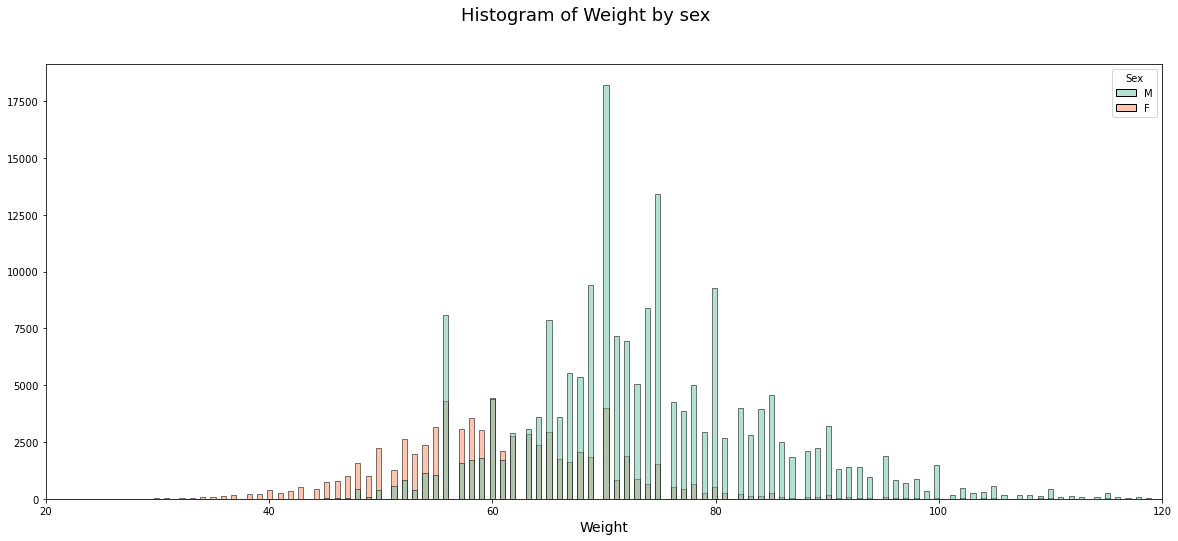

In [56]:
plt.figure(figsize=(20,8))
plt.suptitle("Histogram of Weight by sex", fontsize=18)
plt.xlim(20, 120)

sns.histplot(data=df, x="Weight", color="steelblue", hue='Sex', palette='Set2')
plt.xlabel("Weight", fontsize=14)
plt.ylabel("")

plt.show()

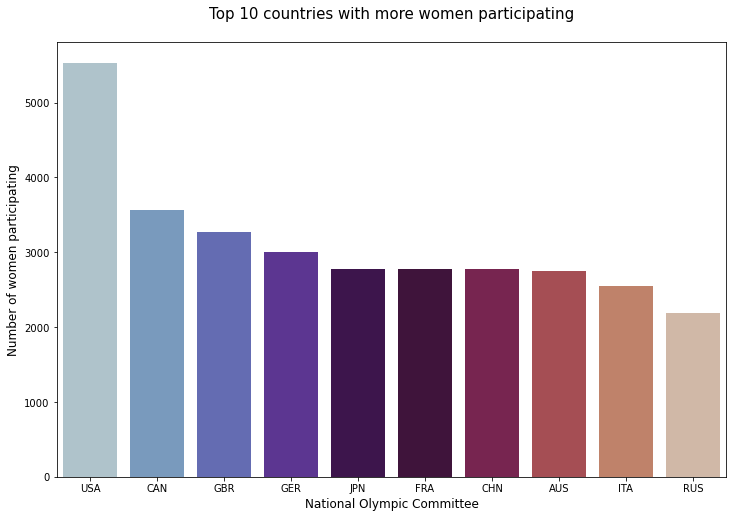

In [57]:
plt.figure(figsize=(12,8))
sns.barplot(x=female['NOC'].value_counts(ascending=False).head(10).index,
            y=female['NOC'].value_counts(ascending=False).head(10).values, 
            saturation=0.90, palette="twilight")
plt.xlabel("National Olympic Committee", fontsize=12)
plt.ylabel("Number of women participating", fontsize=12)
plt.title("Top 10 countries with more women participating\n", fontsize=15)
plt.show()

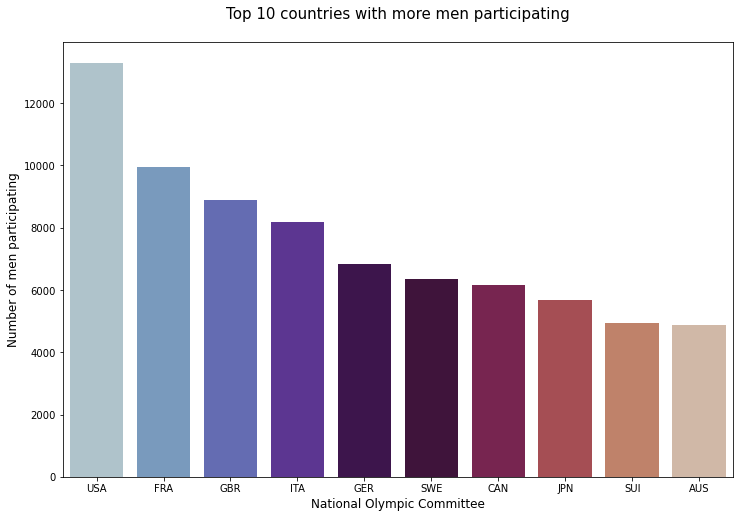

In [58]:
plt.figure(figsize=(12,8))
sns.barplot(x=male['NOC'].value_counts(ascending=False).head(10).index,
            y=male['NOC'].value_counts(ascending=False).head(10).values, 
            saturation=0.90, palette="twilight")
plt.xlabel("National Olympic Committee", fontsize=12)
plt.ylabel("Number of men participating", fontsize=12)
plt.title("Top 10 countries with more men participating\n", fontsize=15)
plt.show()

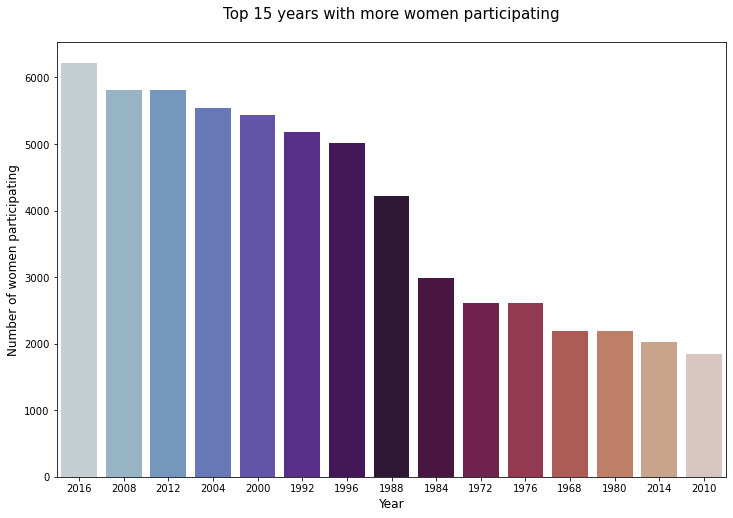

In [59]:
plt.figure(figsize=(12,8))
sns.barplot(x=female['Year'].value_counts(ascending=False).head(15).index.astype('str'),
            y=female['Year'].value_counts(ascending=False).head(15).values, 
            saturation=0.90, palette="twilight")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of women participating", fontsize=12)
plt.title("Top 15 years with more women participating\n", fontsize=15)
plt.show()

### Question: Why do 2010 and 2014 have few women, even though the trend is for women to participate over time?

### The last edition of the Olympics was the one with the most participation of women.

In [60]:
# é pertinente saber disso? London tá em primeiro porque junta as 3 edições de olimpiadas que tiveram em London.

female['City'].value_counts(ascending=False).head()
# female[female['City'] == 'London']['Year'].value_counts()

London            6490
Rio de Janeiro    6223
Beijing           5816
Athina            5557
Sydney            5431
Name: City, dtype: int64

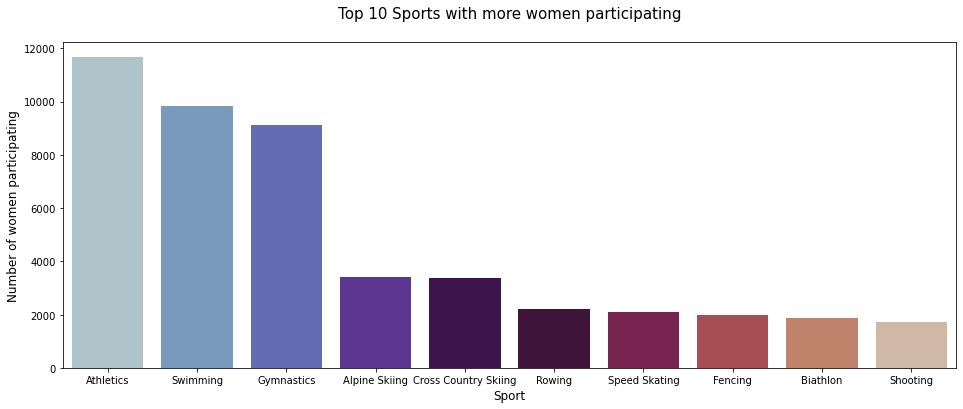

In [61]:
female['Sport'].value_counts()
plt.figure(figsize=(16,6))
sns.barplot(x=female['Sport'].value_counts(ascending=False).head(10).index,
            y=female['Sport'].value_counts(ascending=False).head(10).values, 
            saturation=0.90, palette="twilight")
plt.xlabel("Sport", fontsize=12)
plt.ylabel("Number of women participating", fontsize=12)
plt.title("Top 10 Sports with more women participating\n", fontsize=15)
plt.show()

# Pergunta: Altura, peso influenciam na performance do atleta?
   
   Esta pergunta é interessante, pois dependendo do esporte, altura/peso podem exercer diferentes níveis de influência. Portanto, vimos como necessário separar a análise por esporte.

In [69]:
# Método 1: Calcular a média de altura e peso por esporte e comparar com a média dos medalhistas

df_mean_stats = df.groupby("Sport").mean().drop(columns=["Year"]) # Tira a média da Altura e Peso dos atletas de cada esporte
df_medal_mean_stats = df[df["Medal"] != "No medal"].groupby("Sport").mean().drop(columns=["Year"]) # Tira a média da Altura e Peso dos medalhistas de cada esporte

difference = (1/(df_mean_stats/(df_medal_mean_stats - df_mean_stats)))*100 # Em média, quantos % mais alto/pesado que a média são os medalhistas? 

# Exemplos:
print("Basketball\n"+str(difference.loc["Basketball"]))
print("\nFootball\n"+str(difference.loc["Football"]))
print("\nVolleyball\n"+str(difference.loc["Volleyball"]))
print("\nGymnastics\n"+str(difference.loc["Gymnastics"]))
print("\nAthletics\n"+str(difference.loc["Athletics"]))

Basketball
ID       -0.046062
Age       0.120022
Height    0.598140
Weight    1.094030
NSex      6.812845
Name: Basketball, dtype: float64

Football
ID        2.871380
Age       2.008676
Height    0.027486
Weight    0.286653
NSex      3.669202
Name: Football, dtype: float64

Volleyball
ID        4.343816
Age       2.349620
Height   -0.035723
Weight    0.907121
NSex      2.468457
Name: Volleyball, dtype: float64

Gymnastics
ID        2.325517
Age       2.919725
Height   -0.541647
Weight   -1.943620
NSex     -2.317266
Name: Gymnastics, dtype: float64

Athletics
ID        0.604468
Age      -0.541221
Height    0.728245
Weight    3.029148
NSex      1.474565
Name: Athletics, dtype: float64


In [117]:
# Método 2: Regressão Linear
sport = "Gymnastics"
df_sport_height_weight = df[df["Sport"] == sport].drop(columns = ['Name', 'Sex', 'Age','Team', 'NOC', 'Games','Season', 'City', 'Sport', 'Event', 'Medal'])
df_sport_medals = df[df["Sport"] == sport]["Medal"].apply(lambda x: {"No medal": 0, "Bronze": 1, "Silver":2, "Gold":3}[x])

model = LinearRegression().fit(df_sport_height_weight, df_sport_medals)
r_sq = model.score(df_sport_height_weight, df_sport_medals)

print("R^2:",r_sq)
print("Intercept:", model.intercept_)
print("Slope:", model.coef_)
print("predicted response:", model.predict(df_sport_height_weight),sep = "\n")

R^2: 0.024052147138941993
Intercept: 6.772892565556265
Slope: [ 4.09892490e-09 -2.22168513e-03 -3.74029201e-03 -3.03256249e-03
 -4.11456449e-02]
predicted response:
[0.19614167 0.19614167 0.19614167 ... 0.41319442 0.41319442 0.41319442]


In [115]:
# Método 2: Regressão Linear
sport = "Gymnastics"
df_sport_height_weight = male[male["Sport"] == sport].drop(columns = ['Name', 'Sex', 'Age','Team', 'NOC', 'Games','Season', 'City', 'Sport', 'Event', 'Medal'])
df_sport_medals = male[male["Sport"] == sport]["Medal"].apply(lambda x: {"No medal": 0, "Bronze": 1, "Silver":2, "Gold":3}[x])

model = LinearRegression().fit(df_sport_height_weight, df_sport_medals)
r_sq = model.score(df_sport_height_weight, df_sport_medals)

print("R^2:",r_sq)
print("Intercept:", model.intercept_)
print("Slope:", model.coef_)
print("predicted response:", model.predict(df_sport_height_weight),sep = "\n")

R^2: 0.03257208942476986
Intercept: 7.191370515075574
Slope: [ 1.03139339e-07 -3.38070527e-03 -2.69252485e-03 -3.20468113e-03
  0.00000000e+00]
predicted response:
[0.18470841 0.18470841 0.18470841 ... 0.43081287 0.43081287 0.43081287]


In [116]:
# Método 2: Regressão Linear
sport = "Gymnastics"
df_sport_height_weight = female[female["Sport"] == sport].drop(columns = ['Name', 'Sex', 'Age','Team', 'NOC', 'Games','Season', 'City', 'Sport', 'Event', 'Medal'])
df_sport_medals = female[female["Sport"] == sport]["Medal"].apply(lambda x: {"No medal": 0, "Bronze": 1, "Silver":2, "Gold":3}[x])

model = LinearRegression().fit(df_sport_height_weight, df_sport_medals)
r_sq = model.score(df_sport_height_weight, df_sport_medals)

print("R^2:",r_sq)
print("Intercept:", model.intercept_)
print("Slope:", model.coef_)
print("predicted response:", model.predict(df_sport_height_weight),sep = "\n")

R^2: 0.004525793332496475
Intercept: 4.594535925458615
Slope: [-1.87516221e-07 -7.51888807e-04 -3.30290708e-03 -2.09464433e-03
  0.00000000e+00]
predicted response:
[0.18498167 0.18498167 0.18498167 ... 0.17361689 0.17361689 0.17361689]


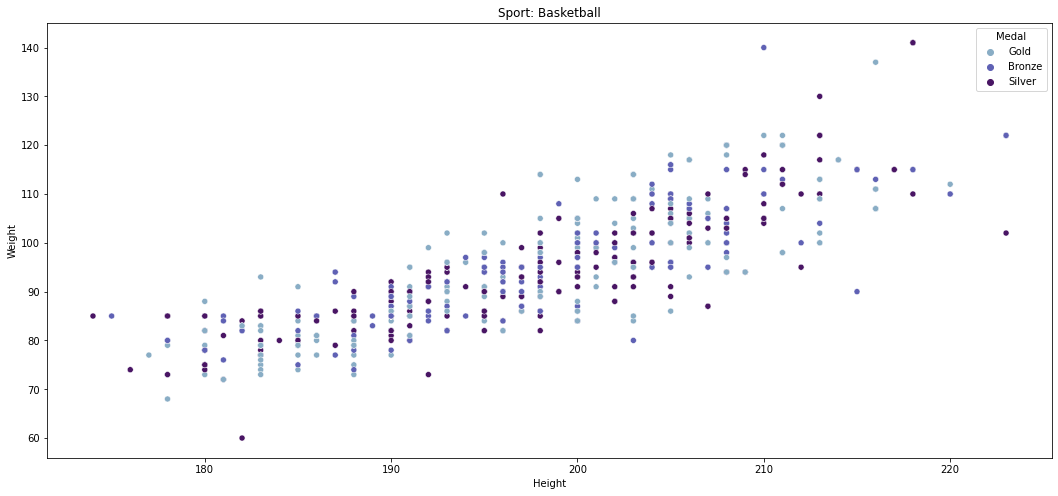

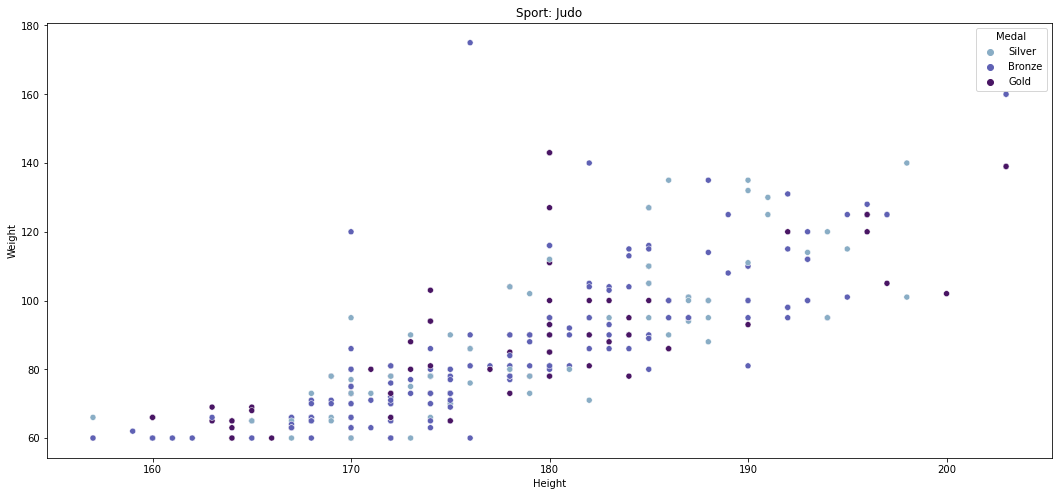

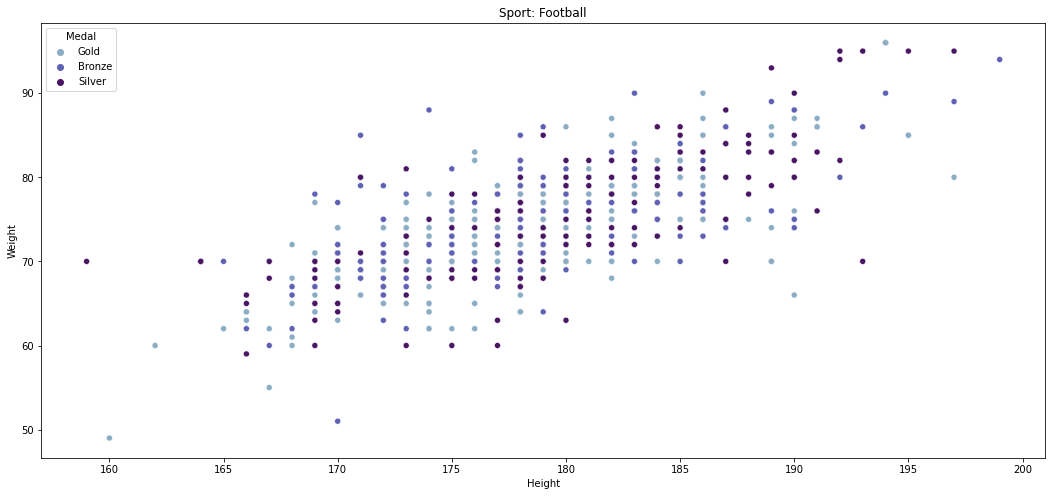

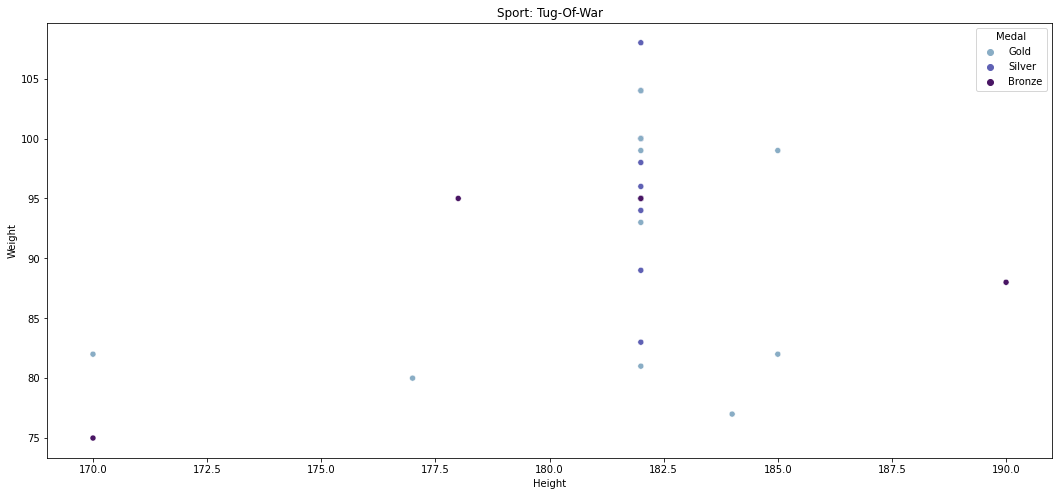

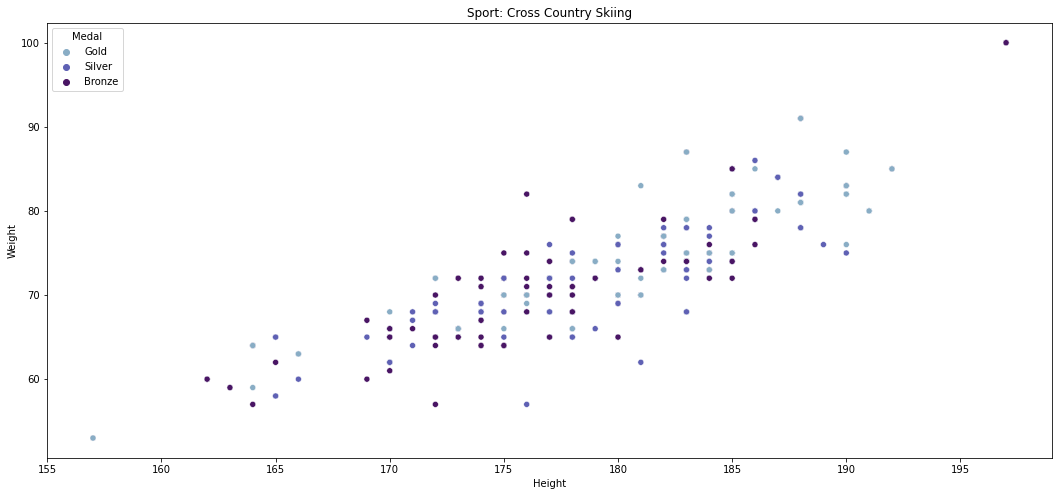

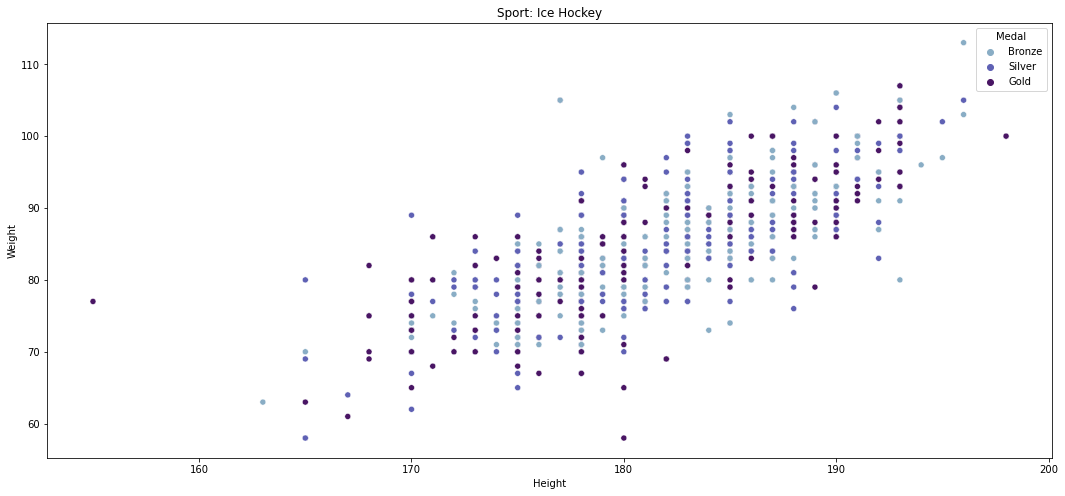

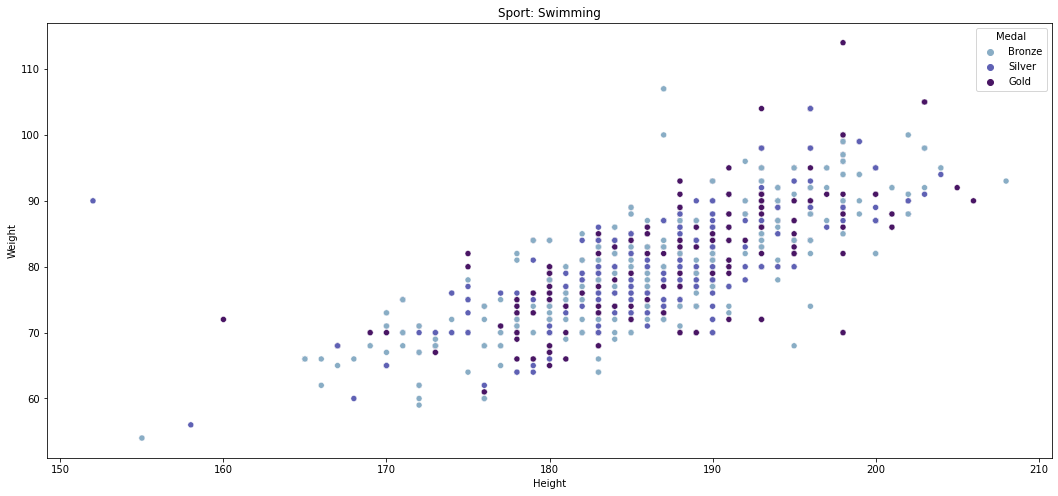

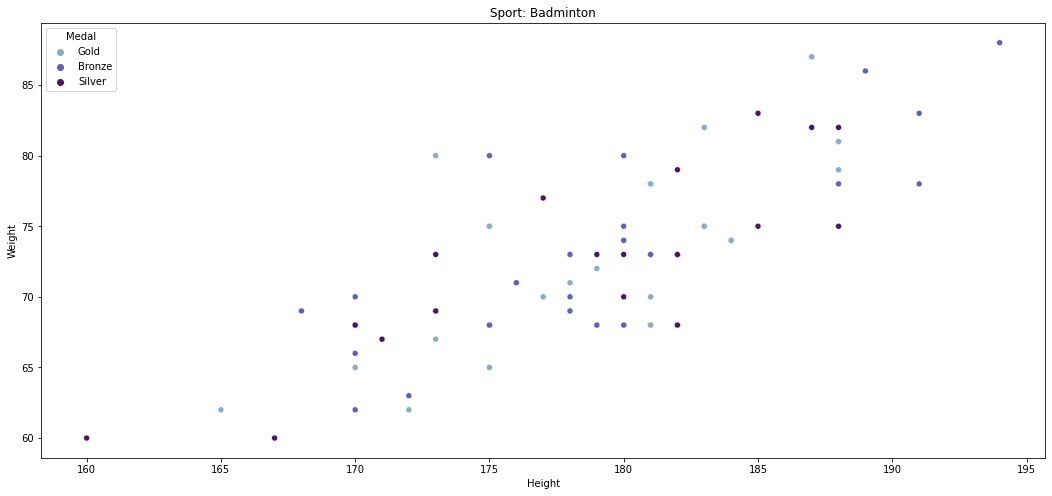

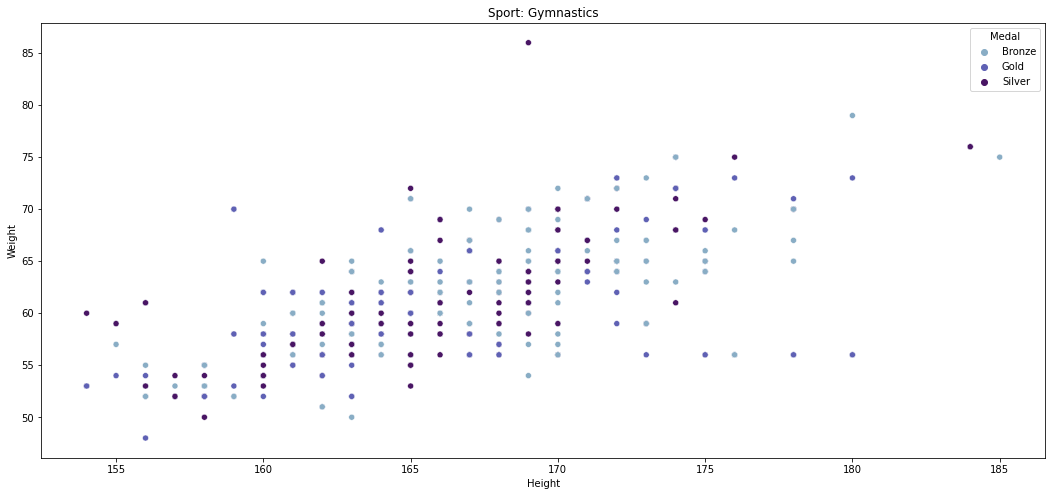

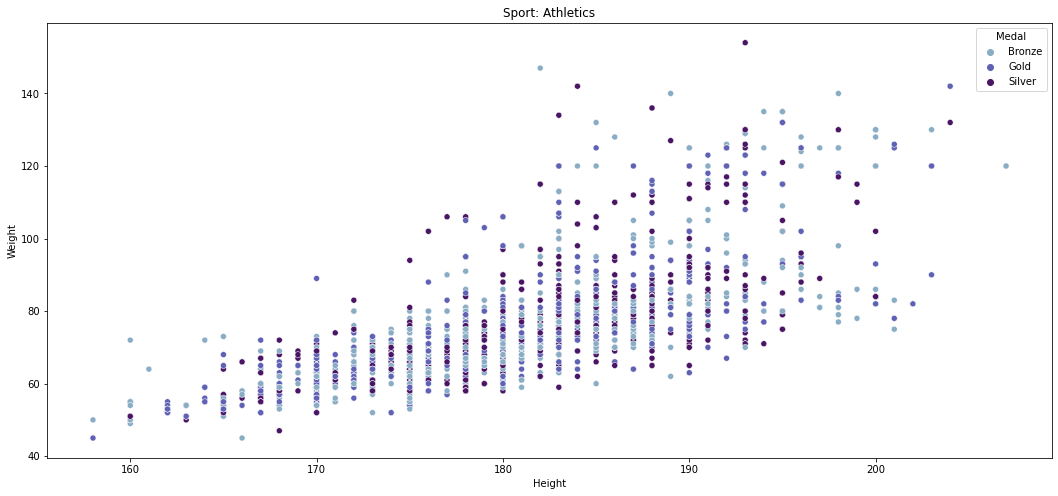

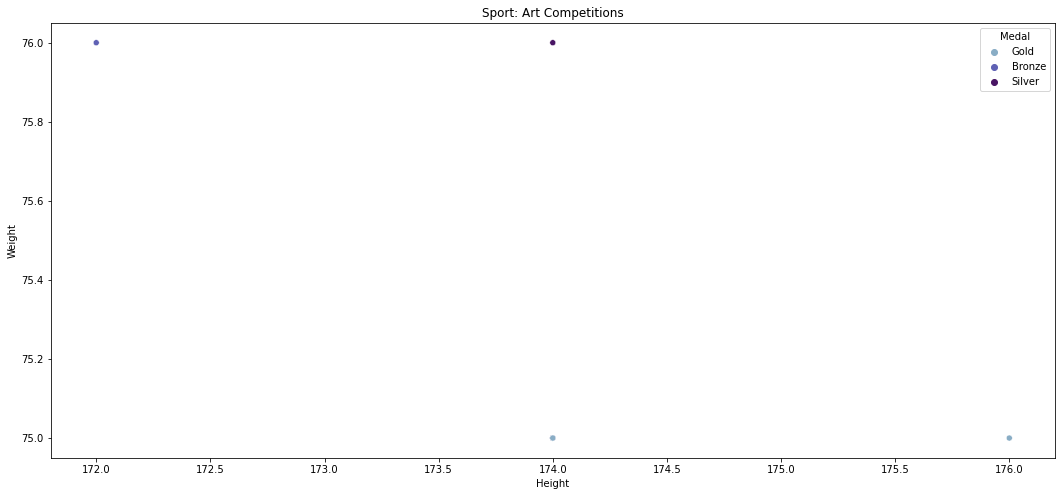

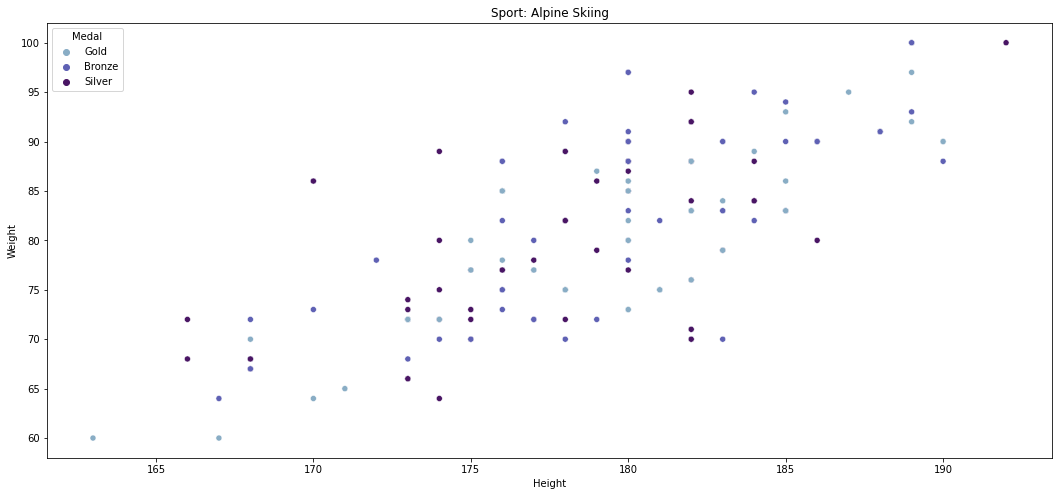

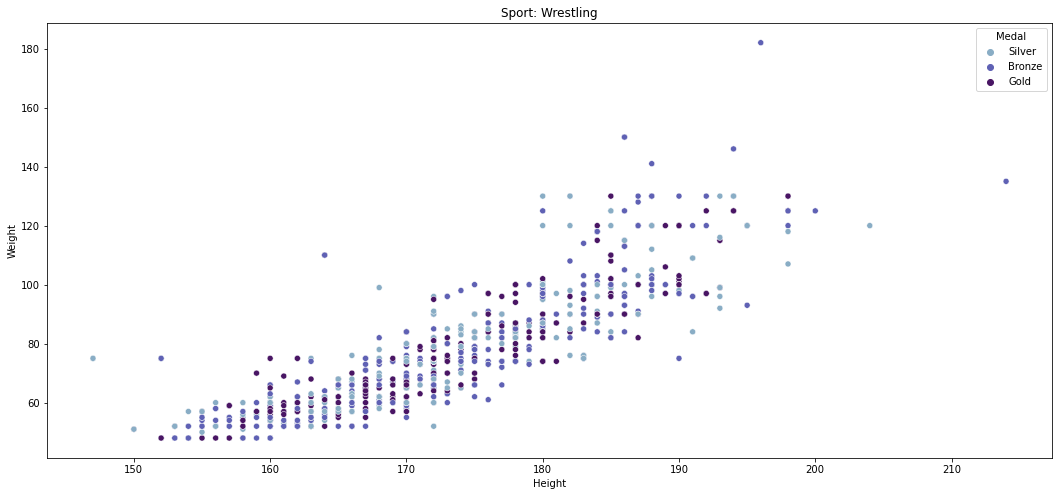

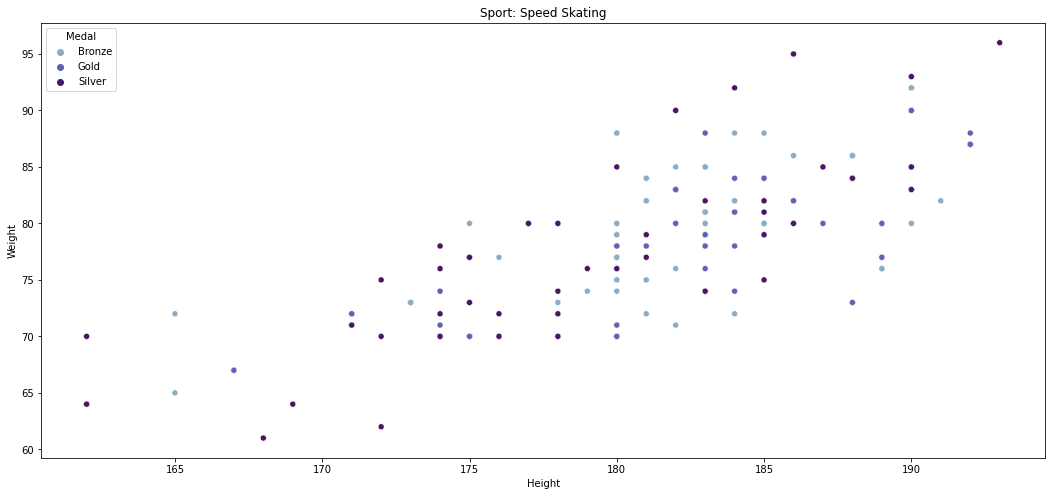

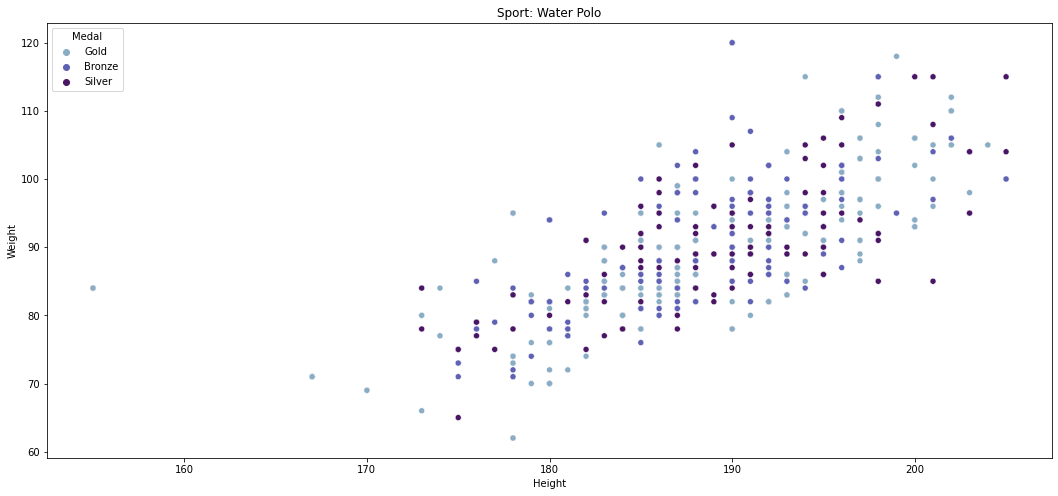

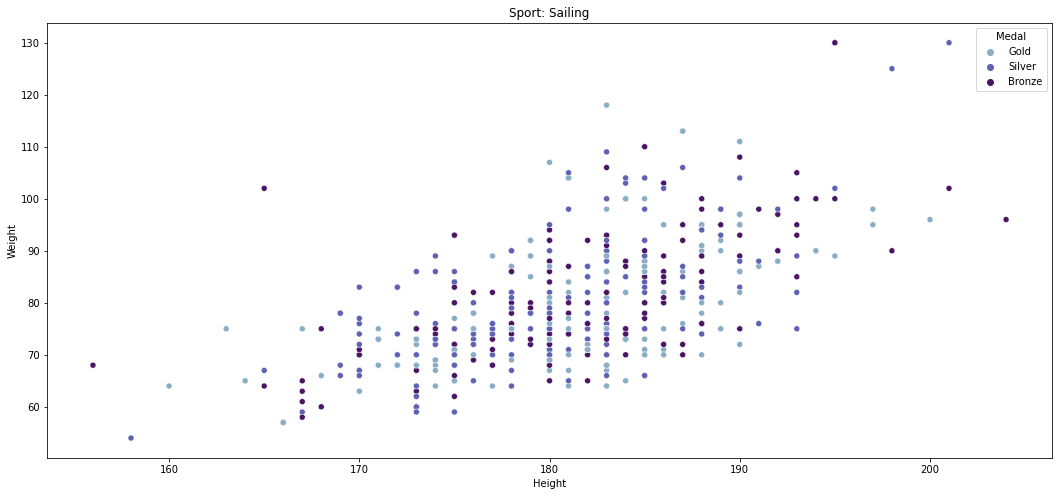

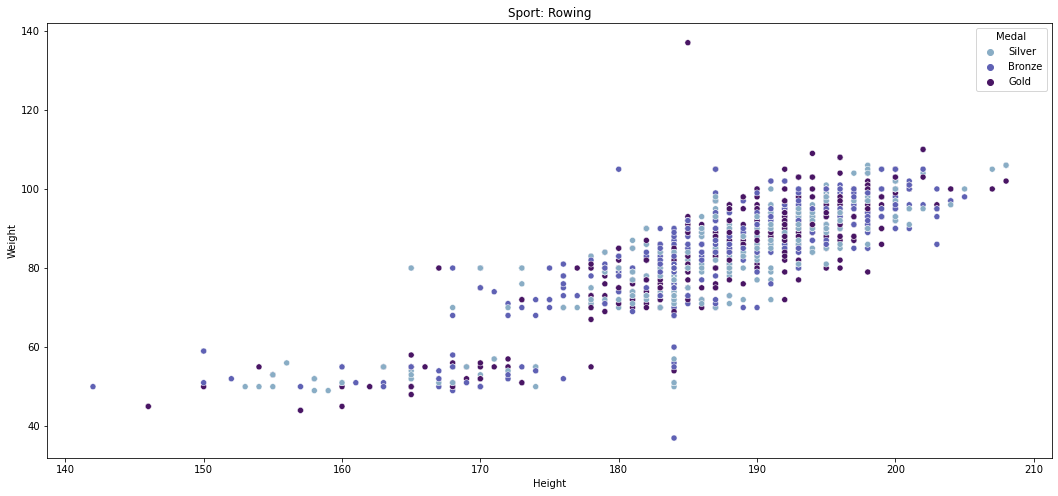

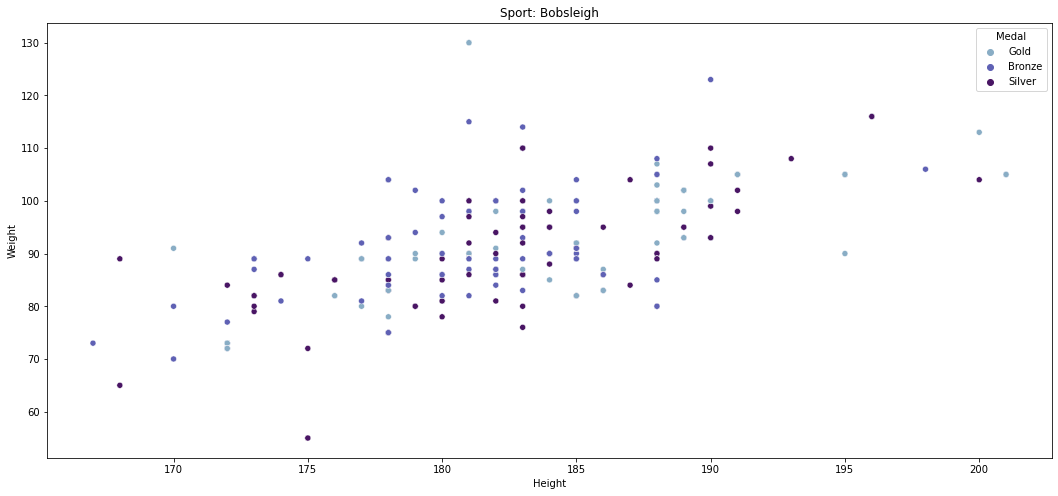

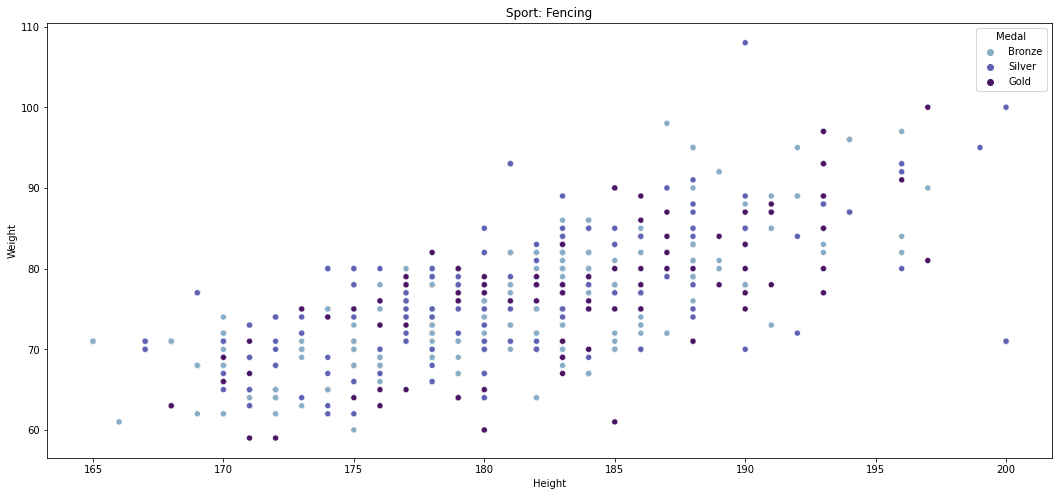

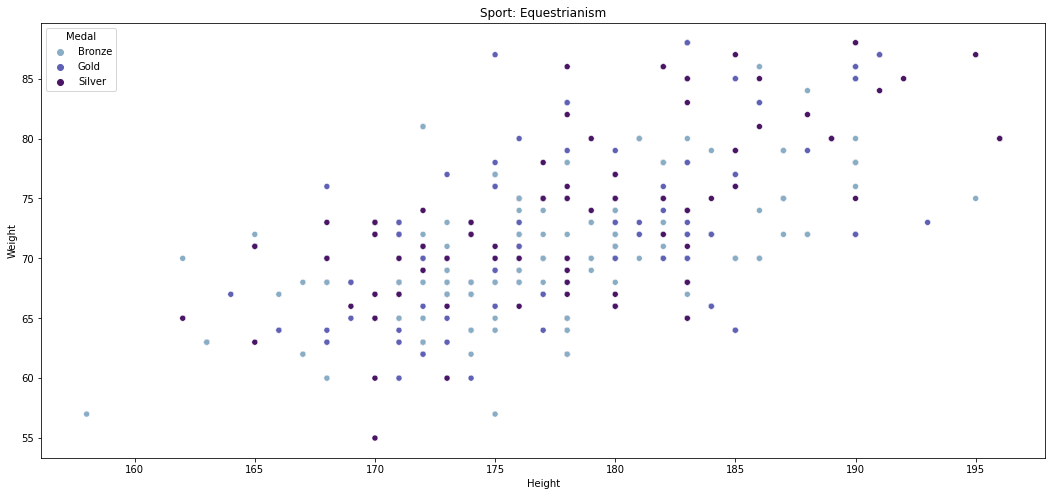

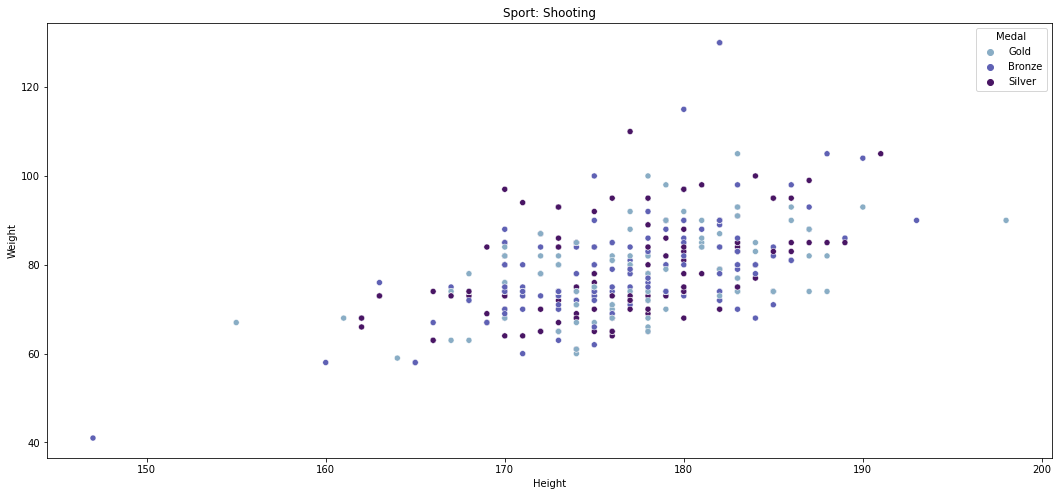

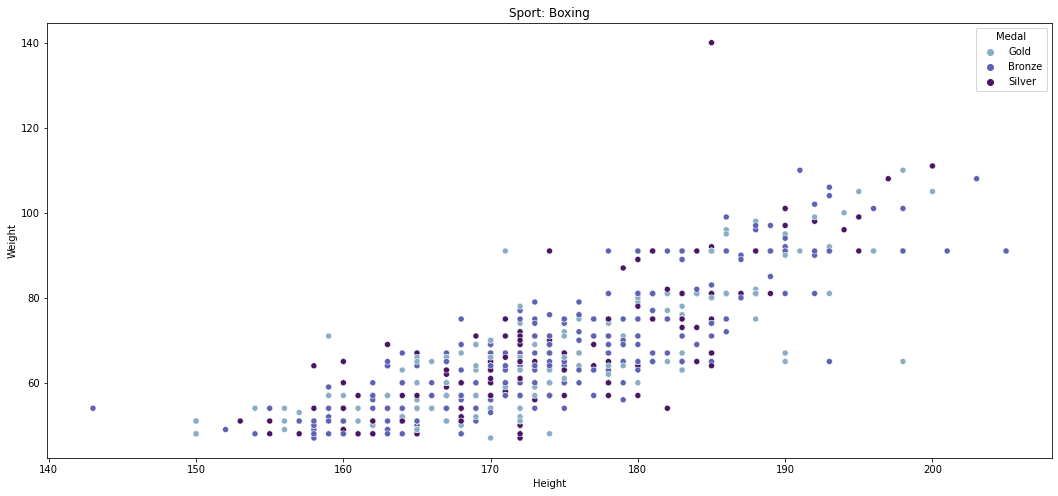

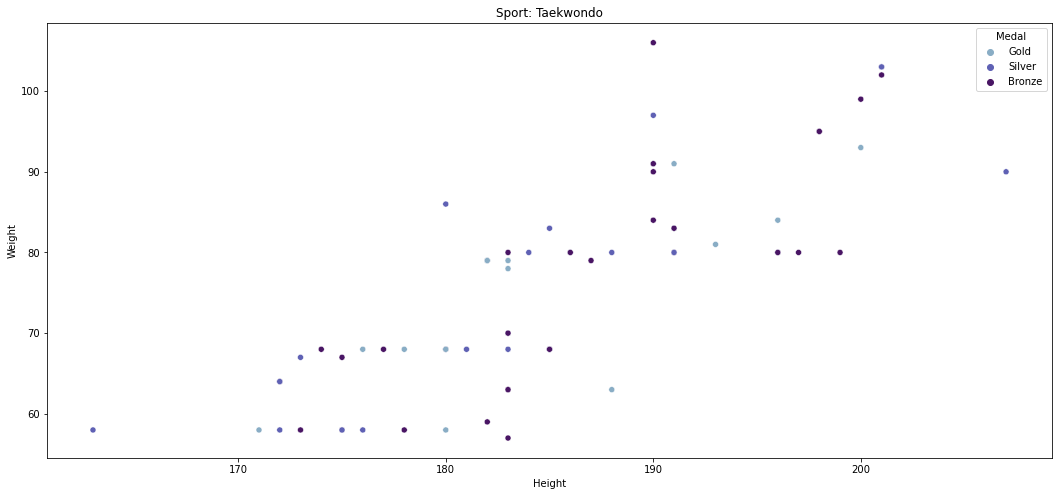

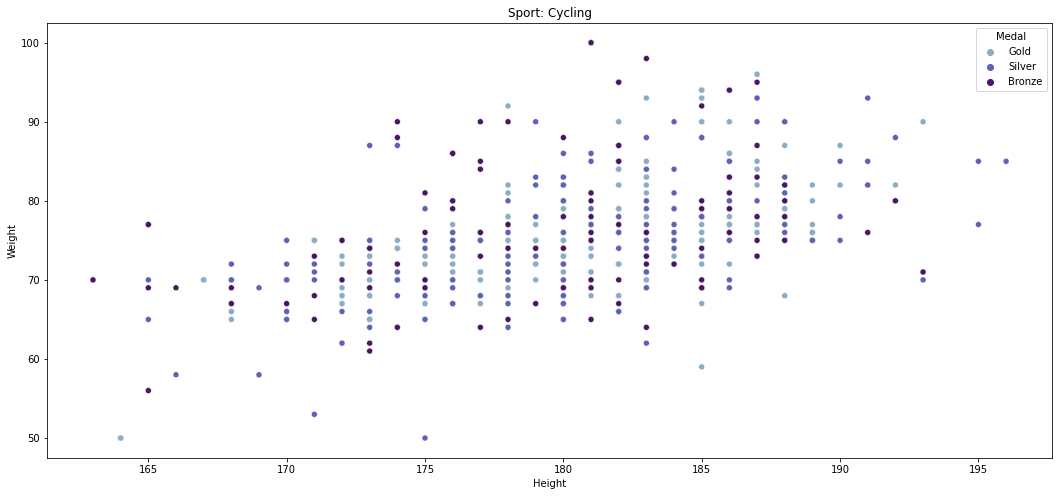

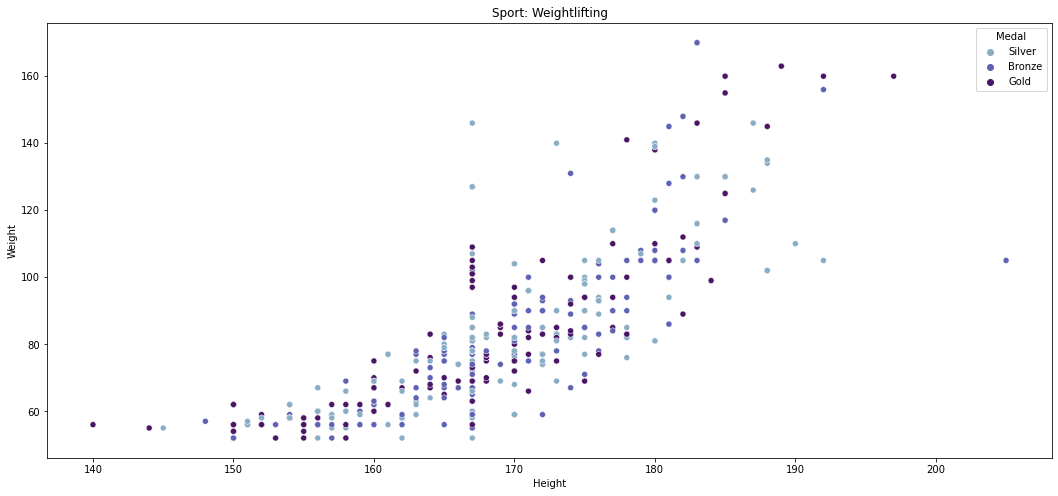

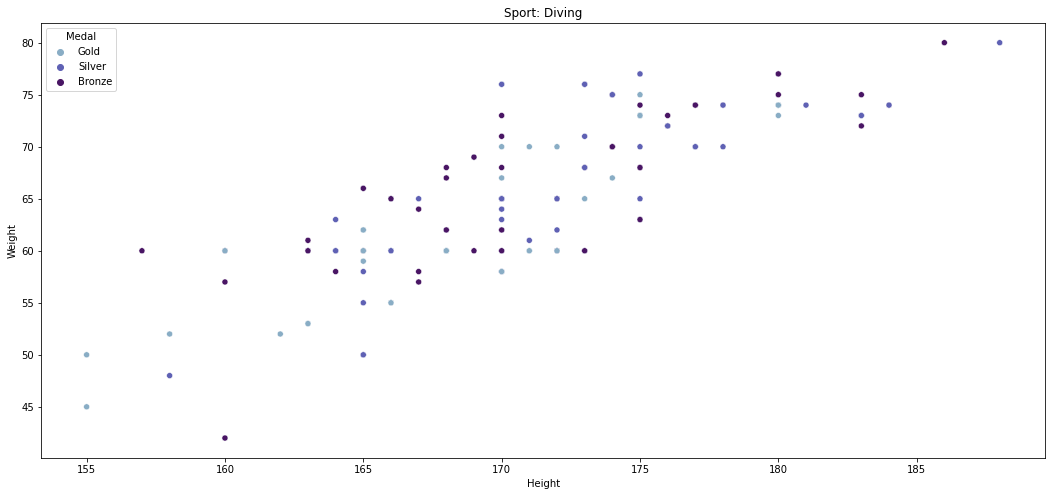

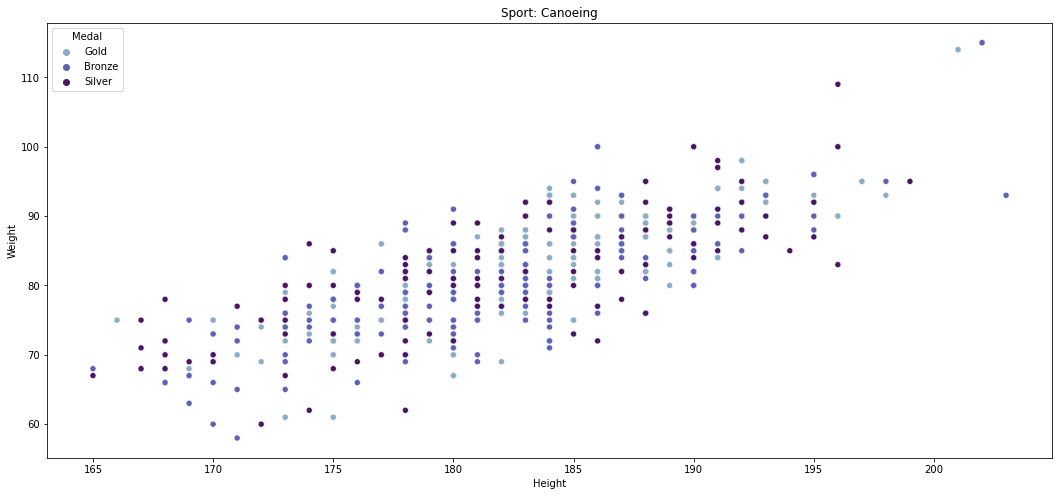

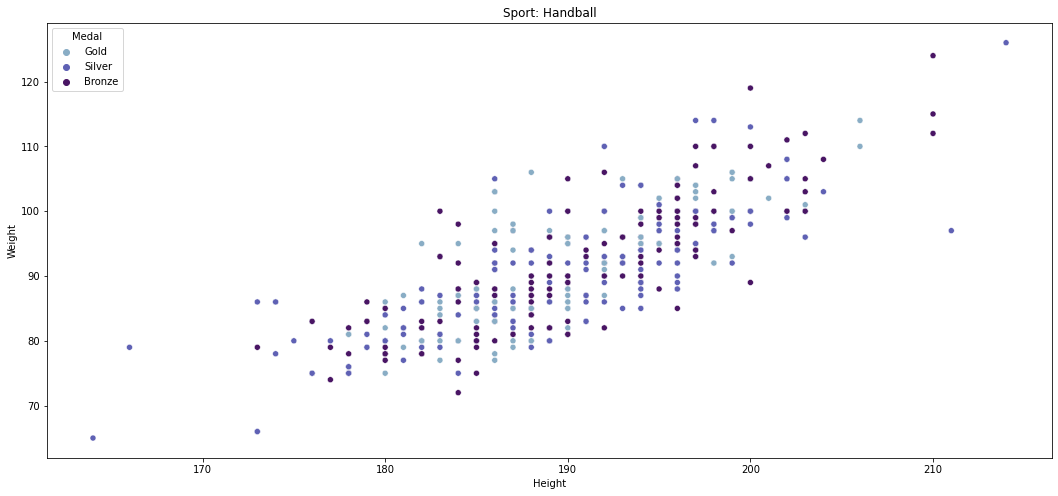

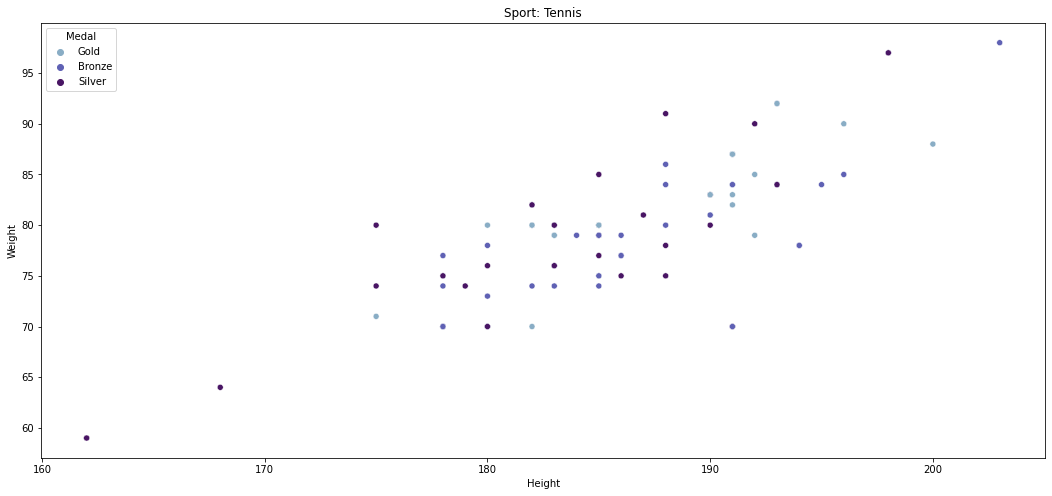

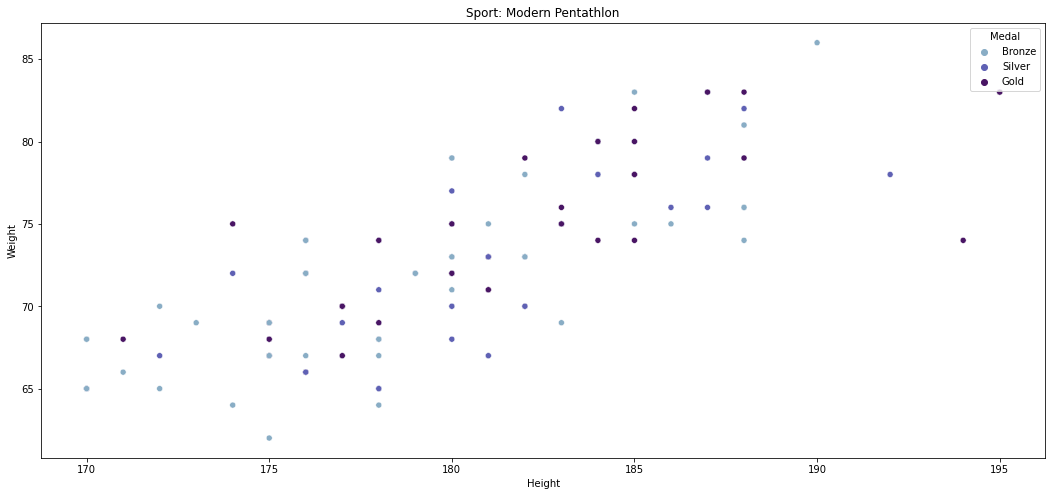

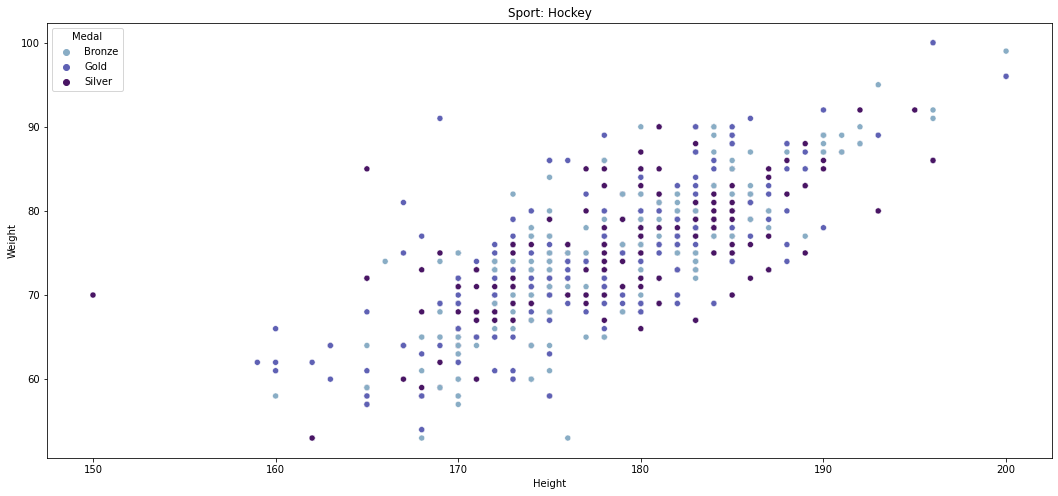

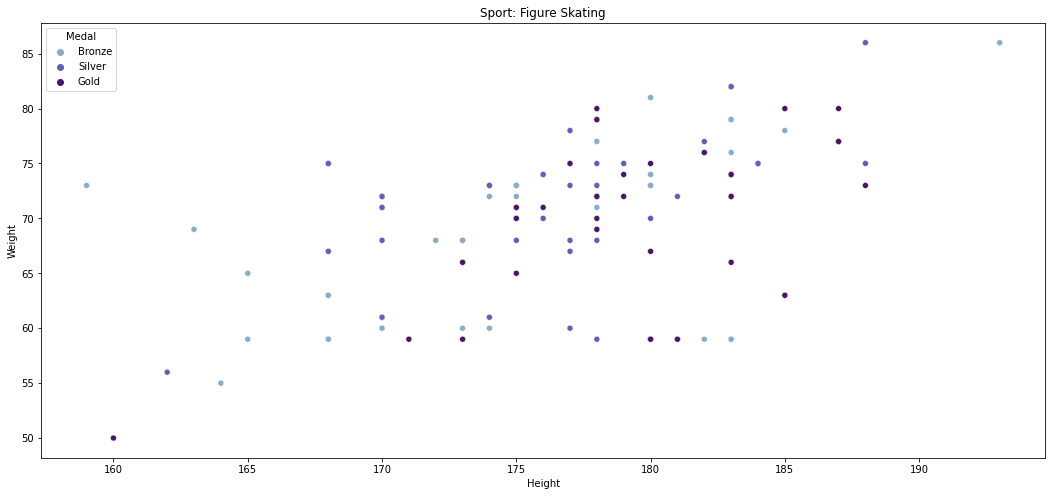

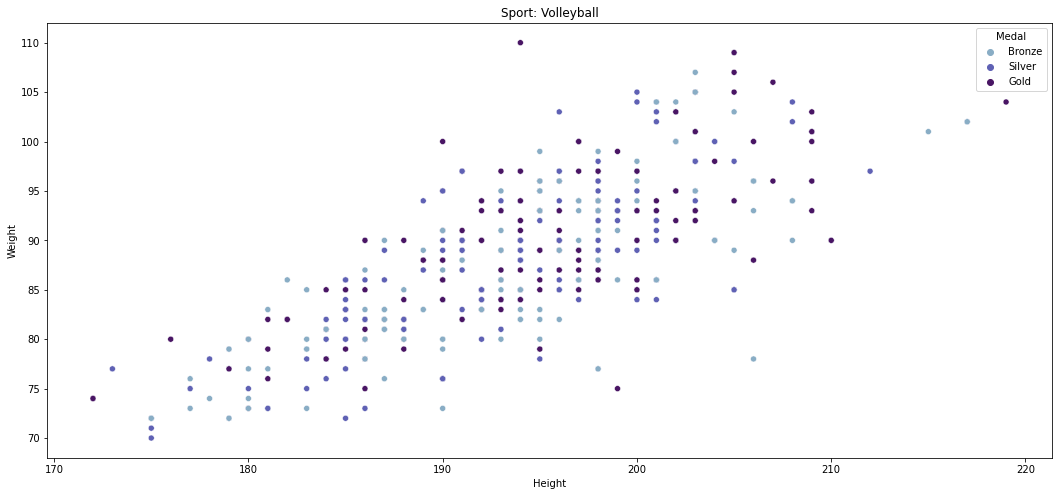

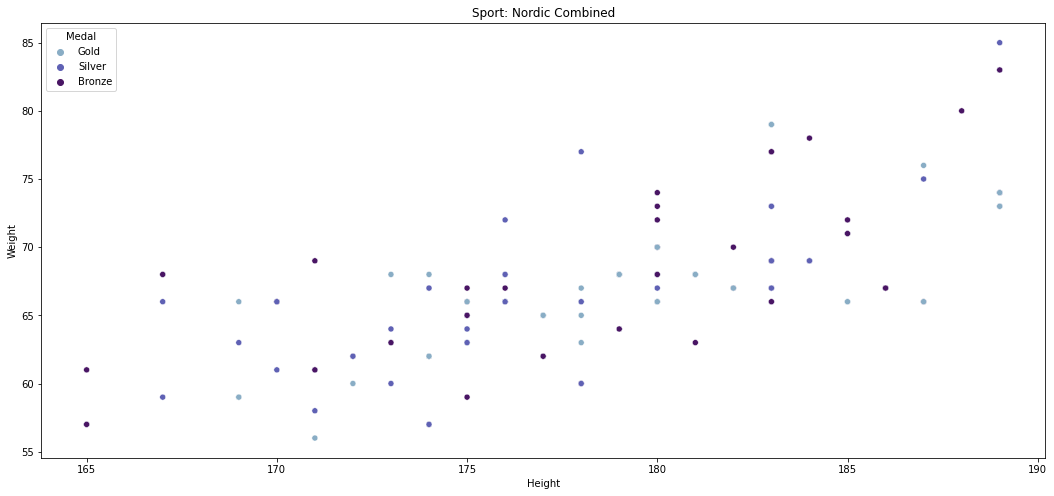

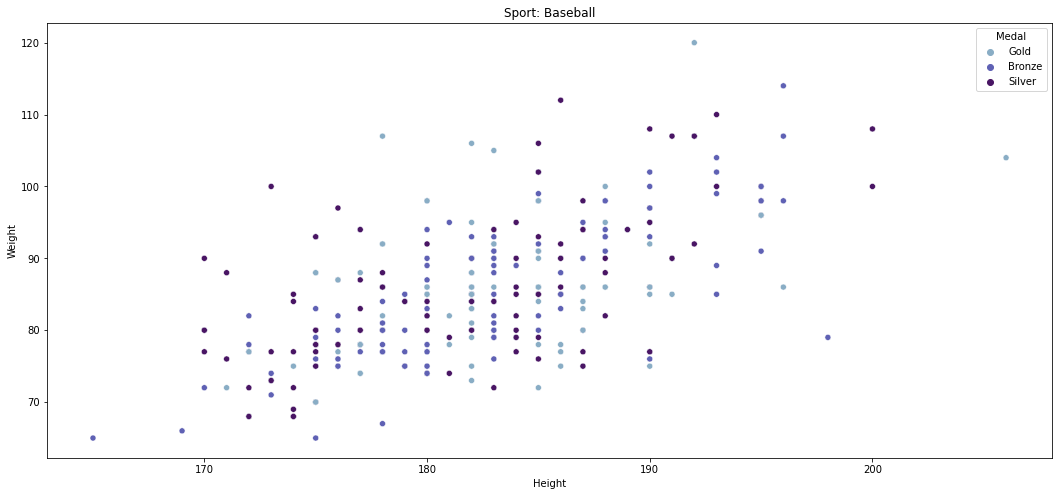

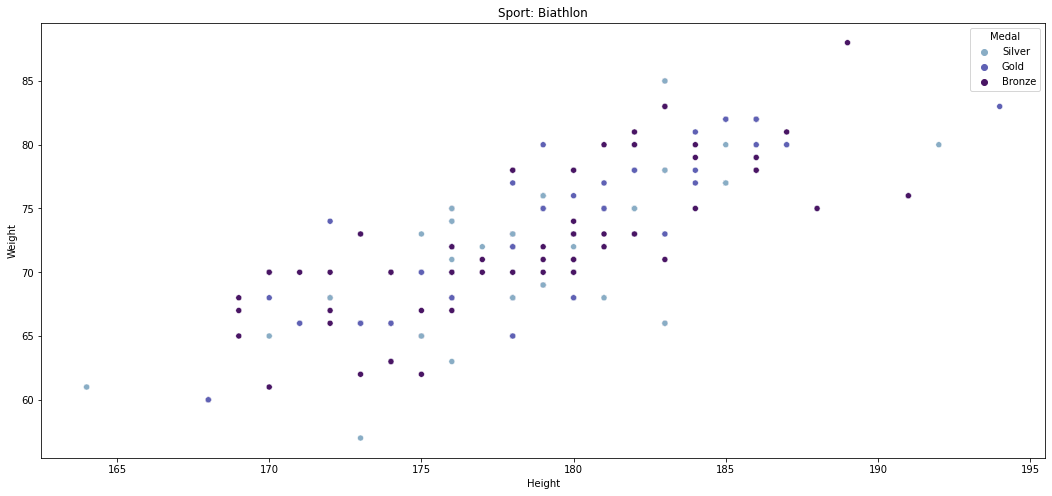

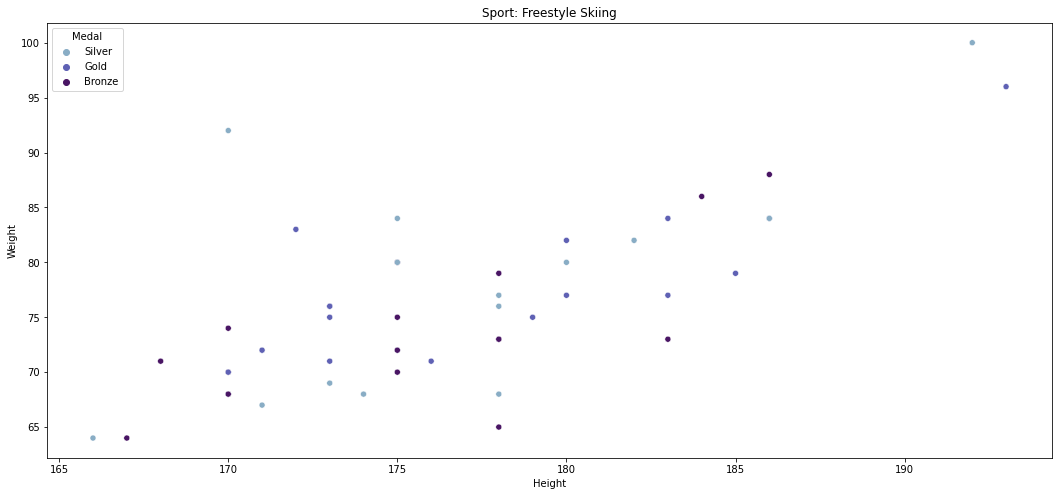

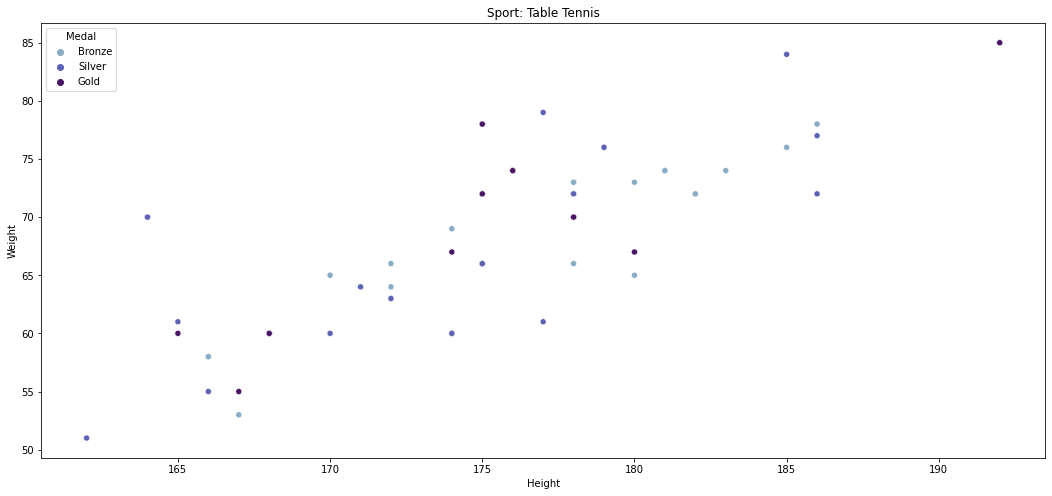

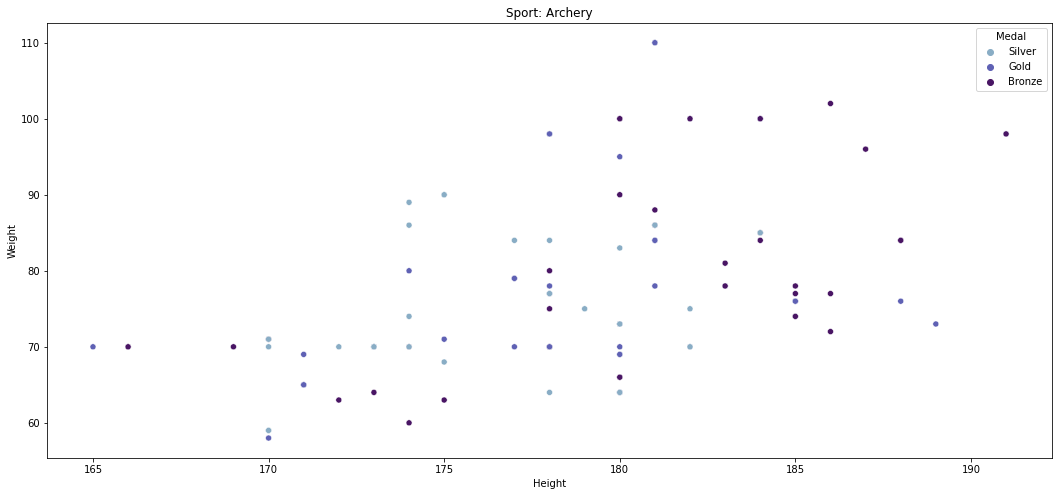

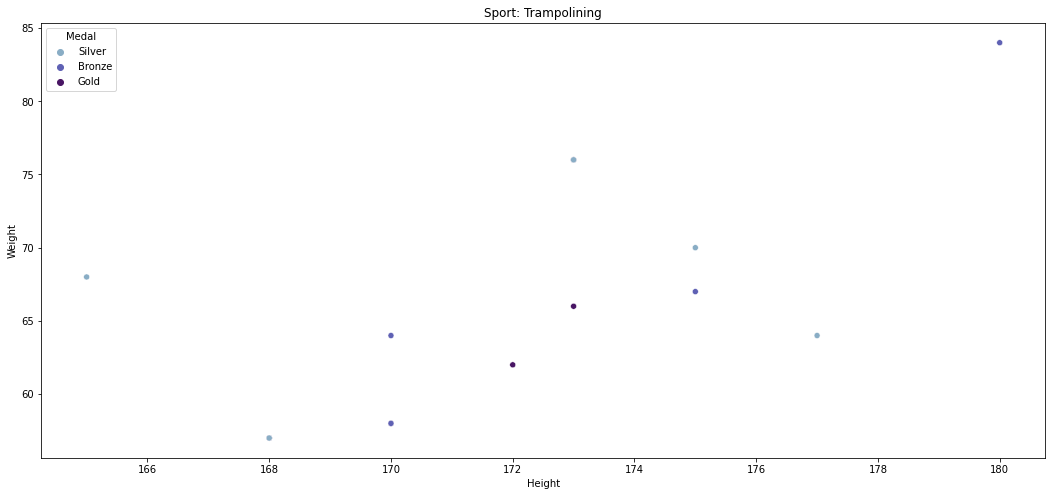

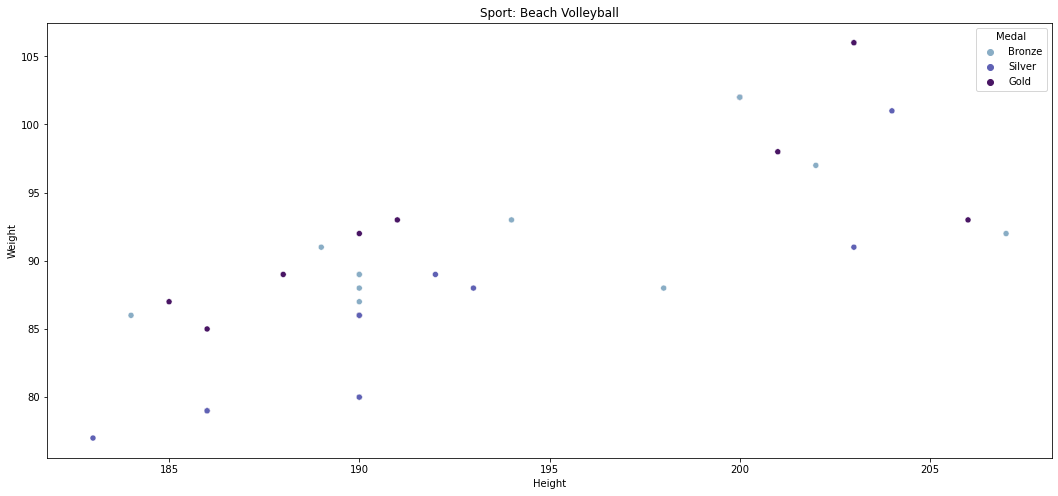

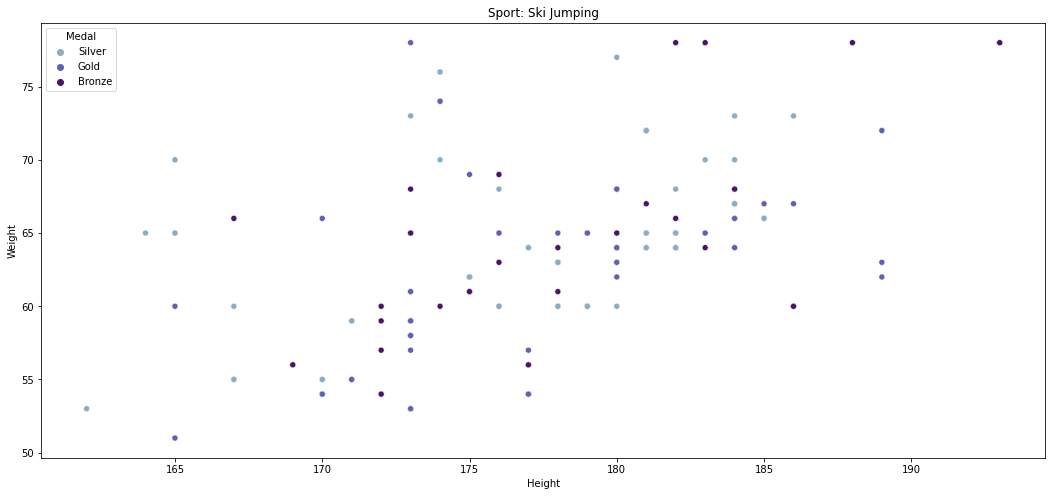

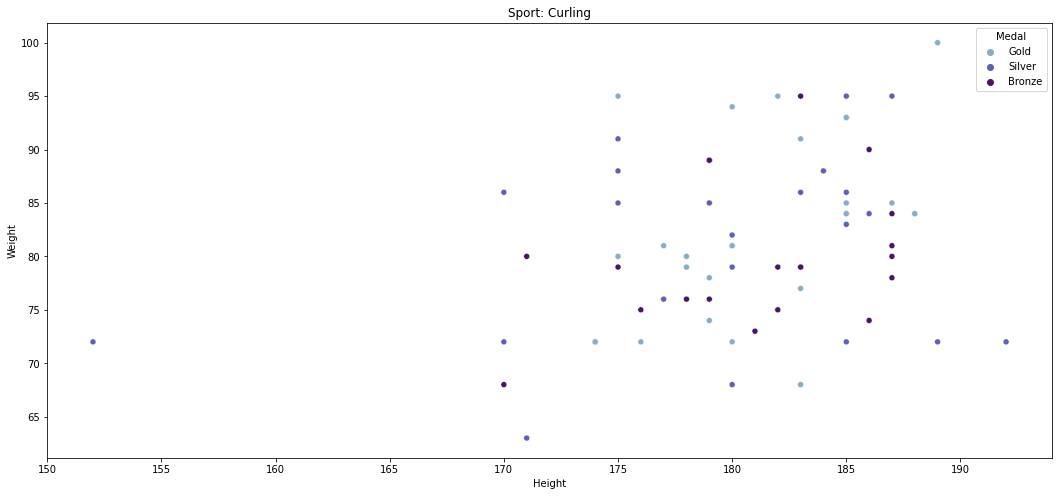

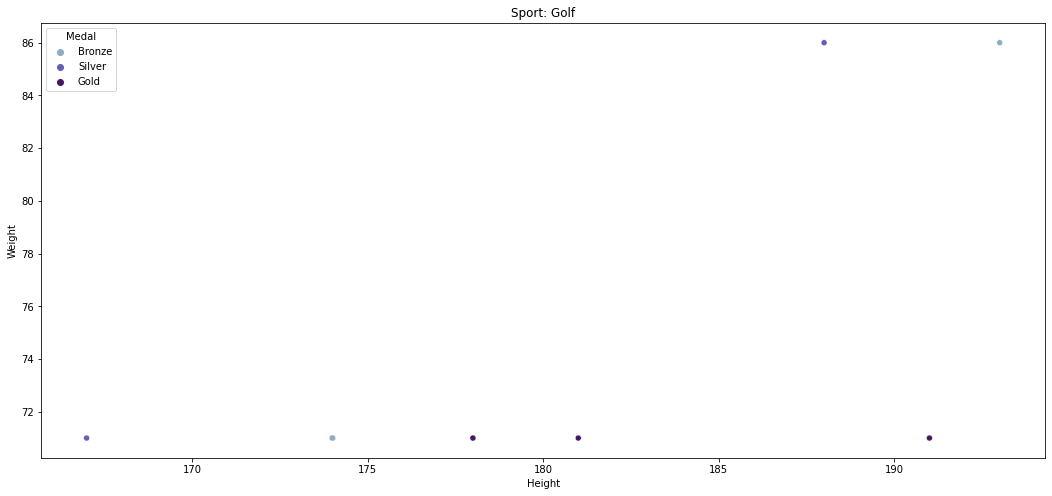

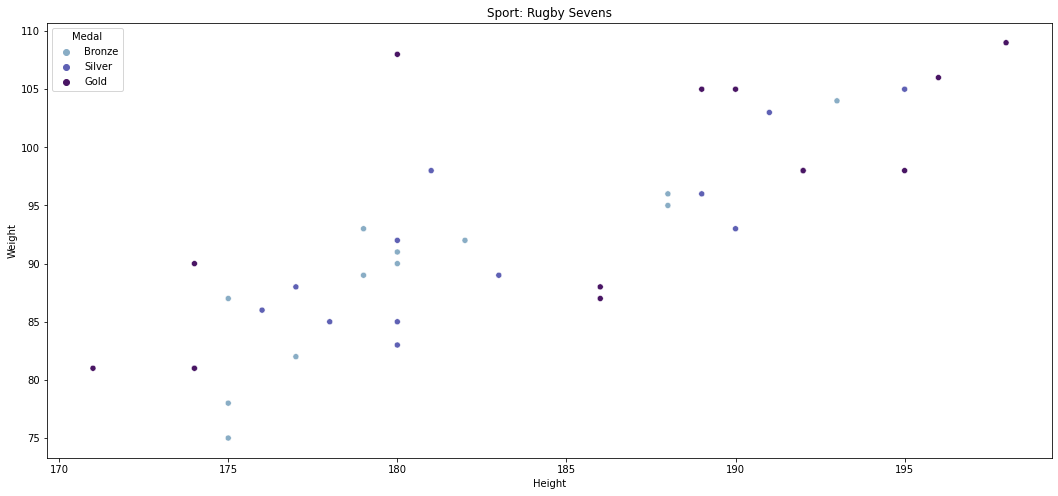

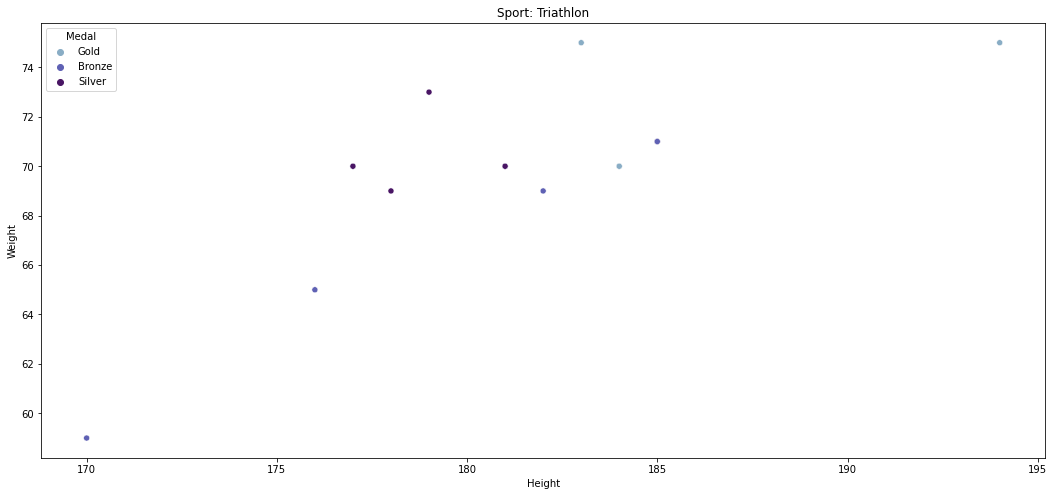

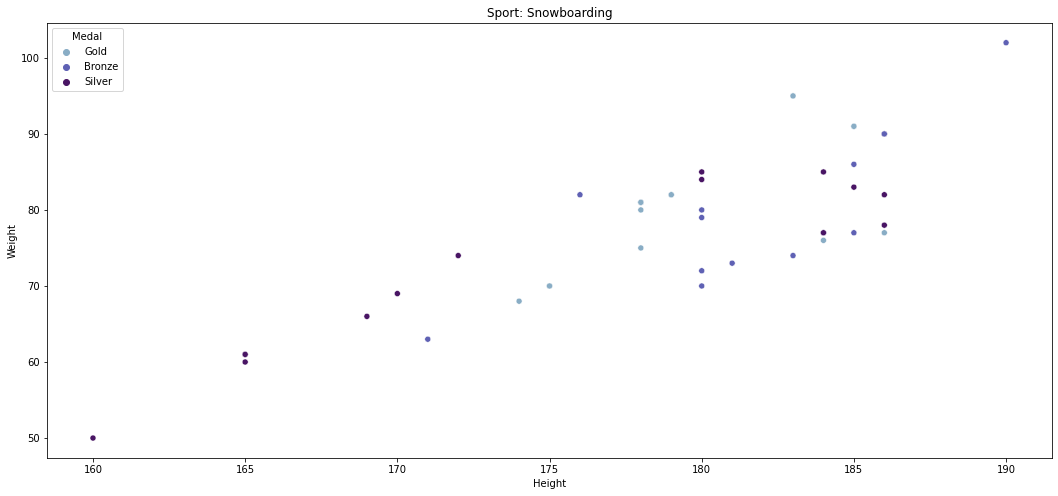

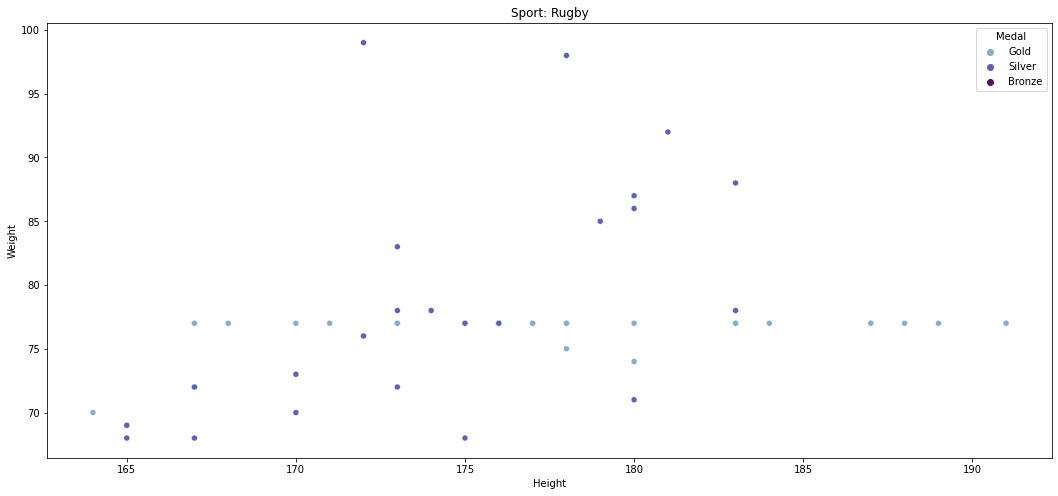

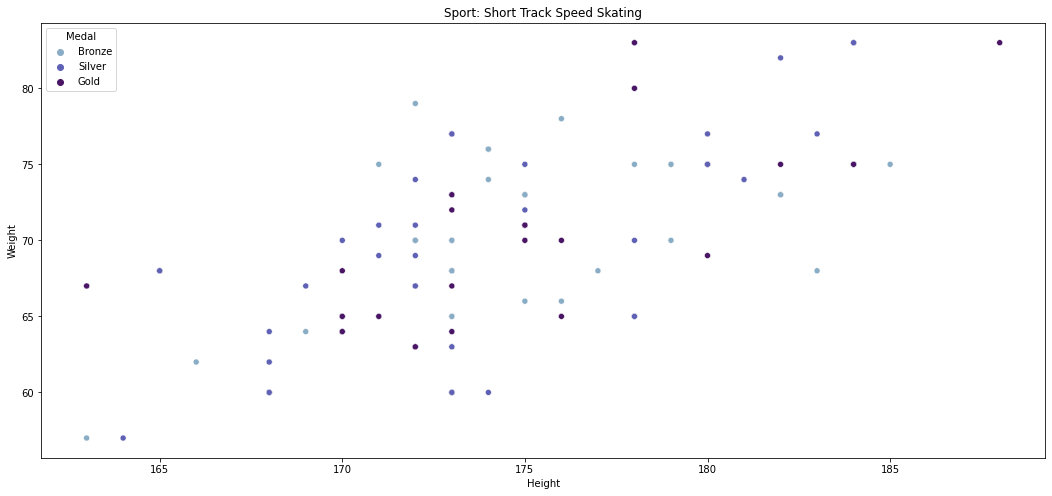

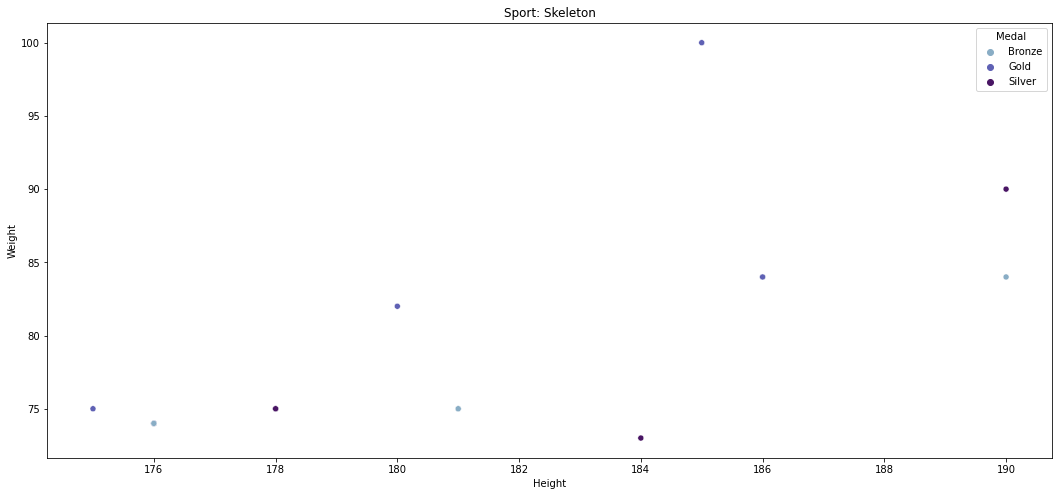

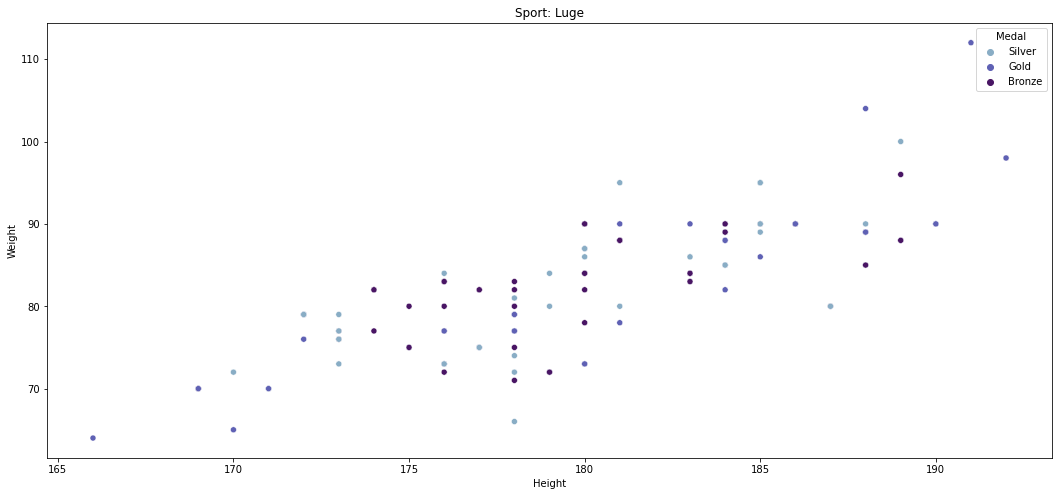

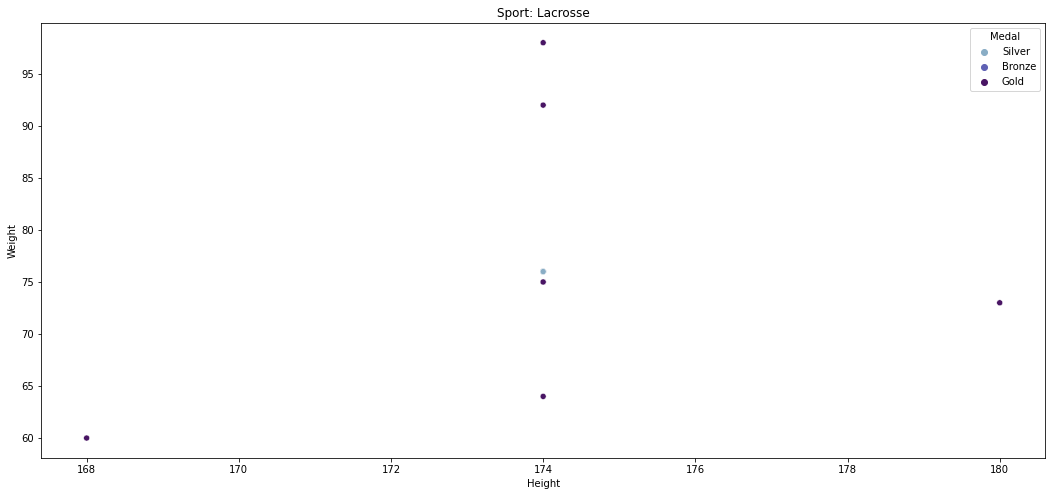

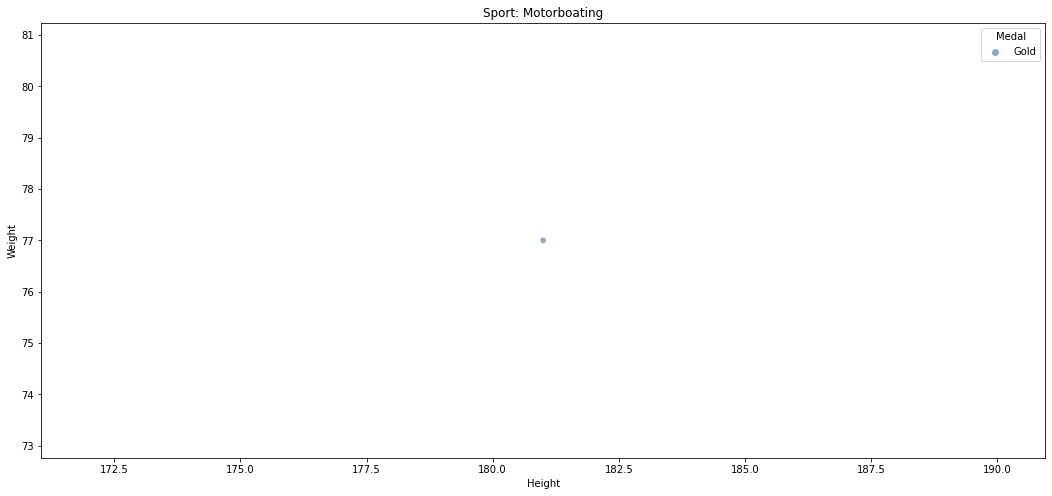

In [118]:
for i in male['Sport'].unique():
    gym = male[male['Sport'] == f"{i}"]
    gym = gym[gym['Medal'].isin(['Bronze', 'Silver', 'Gold'])]
    plt.figure(figsize=(18,8))
    sns.scatterplot(data=gym, x="Height", y="Weight", hue="Medal")
    plt.title(f"Sport: {i}")
    plt.show()

### RESPOSTA:

Em ambos os métodos, não foram encontradas relações signficativas entre altura/peso e o desempenho dos atletas. Este resultado era esperado em esportes de times, onde há uma maior variedade de biotipos. Porém, o mesmo resultado se repetiu nos caso de esportes como ginástica e atletismo, onde presumia-se que certos biotipos fossem ter vantagem.

# Pergunta: Quão diferente é a Altura e Peso dos atletas nas olimpíadas de Verão e Inverno
Para responder esta pergunta, vamos calcular a altura média dos atletas de verão e inverno. Feito isso, calculamos o coeficiente de variância, para nos certificar que a média é a medida de centralidade adequada.

In [64]:
df_winter = df[df["Season"] == "Winter"]
df_summer = df[df["Season"] == "Summer"]

print("Mean height for winter olympics:",df_winter["Height"].mean())
print("Mean weight for winter olympics:",df_winter["Weight"].mean())

print("\n\nMean height for summer olympics:",df_summer["Height"].mean())
print("Mean weight for summer olympics:",df_summer["Weight"].mean())

print("\n\nCV height for summer olympics:",df_summer["Height"].std()/df_summer["Height"].mean())
print("CV weight for summer olympics:",df_summer["Weight"].std()/df_summer["Weight"].mean())

print("\n\nCV height for winter olympics:",df_winter["Height"].std()/df_winter["Height"].mean())
print("CV weight for winter olympics:",df_winter["Weight"].std()/df_winter["Weight"].mean())

Mean height for winter olympics: 174.54727014159403
Mean weight for winter olympics: 70.82159566355449


Mean height for summer olympics: 175.12828042090115
Mean weight for summer olympics: 70.43194531882364


CV height for summer olympics: 0.05745056404535101
CV weight for summer olympics: 0.19033784984950047


CV height for winter olympics: 0.04546740666468073
CV weight for winter olympics: 0.16277342367868025


### Percebemos que os coeficientes de variância não são muito grandes, indicando relativa uniformidade entre os dados. Concluímos que a média é uma medida adequada.

In [65]:
mean_height = pd.DataFrame({"Summer": [df_summer["Height"].mean()], "Winter": [df_winter["Height"].mean()]})

(100.0, 180.0)

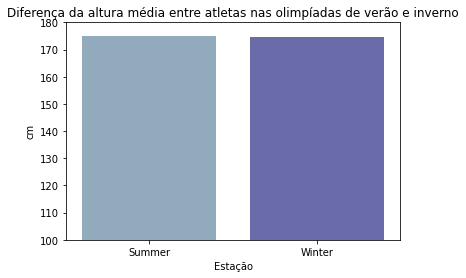

In [66]:
sns.barplot(data=mean_height).set_title("Diferença da altura média entre atletas nas olimpíadas de verão e inverno")
plt.xlabel('Estação')
plt.ylabel('cm')
plt.ylim(100, 180)

In [67]:
mean_weight = pd.DataFrame({"Summer": [df_summer["Weight"].mean()], "Winter": [df_winter["Weight"].mean()]})

(50.0, 75.0)

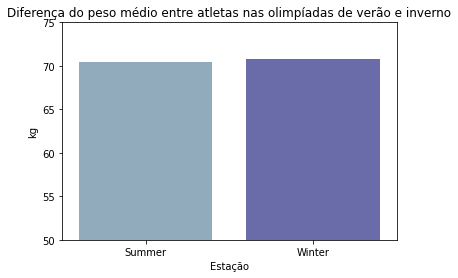

In [68]:
sns.barplot(data=mean_weight).set_title("Diferença do peso médio entre atletas nas olimpíadas de verão e inverno")
plt.xlabel('Estação')
plt.ylabel('kg')
plt.ylim(50, 75)

### Resposta:
Não existe diferença significativa entre a altura/peso entre os atletas de verão e inverno.